In [104]:
# Run if using on google collab, change path accordingly
from google.colab import drive # type: ignore
drive.mount('/content/drive', force_remount=True)
path = '/content/drive/MyDrive/Colab Notebooks/ML - LGI/Project_Unsupervised/'

Mounted at /content/drive


In [105]:
# run if running locally
# path = ''

In [106]:
!pip install git+https://github.com/sevamoo/SOMPY.git #egg=SOMPY
!pip install scikit-image

  Cloning https://github.com/sevamoo/SOMPY.git to /tmp/pip-req-build-2chbys02
  Running command git clone --filter=blob:none --quiet https://github.com/sevamoo/SOMPY.git /tmp/pip-req-build-2chbys02
  Resolved https://github.com/sevamoo/SOMPY.git to commit 6aca604b06e5eea1391ecf507810c7aabafc3f8b
  Preparing metadata (setup.py) ... done


In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import multiprocessing
import sompy
from sompy.sompy import SOMFactory

cpuc = multiprocessing.cpu_count()-1

#setting seaborn visual style in plt
sns.set_theme()

In [108]:
from tqdm import tqdm

# Integration & Exploration

In [109]:
# dataDF: pd.DataFrame = pd.read_excel(path + 'data/Descriptive_Data.xlsx')
# print(f"Duplicaded: {dataDF.duplicated().sum()}\nMissing: {dataDF.isna().sum().sum()}\nNon-Registered (empty): {(dataDF["Registered"] != "Yes").sum()}")

In [110]:
# import the data and drop remove useless stuff
dataDF: pd.DataFrame = pd.read_excel(path + 'data/Descriptive_Data.xlsx')
dataDF: pd.DataFrame = dataDF.set_index('Userid')
dfSuccess: pd.DataFrame = pd.read_excel(path+'data/Descriptive_Data.xlsx',sheet_name=1)
dfSuccess = dfSuccess.set_index('Userid')
dataDF = dataDF.join(dfSuccess, 'Userid')
dataDF = dataDF.drop('Observations', axis=1).drop_duplicates()
dataDF = dataDF[dataDF['Registered'] == 'Yes']
dataDF = dataDF.drop('Registered', axis=1)

In [111]:
metricFeatures: list[str] = ['Application order','Previous qualification score','Entry score','Age at enrollment','N units credited 1st period',
       'N units taken 1st period', 'N scored units 1st period',
       'N units approved 1st period', 'Average grade 1st period',
       'N unscored units 1st period', 'N units credited 2nd period',
       'N units taken 2nd period', 'N scored units 2nd period',
       'N units approved 2nd period', 'Average grade 2nd period',
       'N unscored units 2nd period','Social Popularity']
categoricalFeatures: list[str] =  ['Application mode','Marital status','Course','Previous qualification','Nationality','Mother\'s qualification',
       'Father\'s qualification','Mother\'s occupation','Father\'s occupation']
boolFeatures: list[str] = ['Morning shift participation','Displaced','Special needs','Debtor','Regularized Fees','Gender_Male','External Funding','International']

academicFeatures: list[str] = ['Previous qualification score','Entry score','N units taken 1st period', 'N scored units 1st period',
       'N units approved 1st period', 'Average grade 1st period',
       'N unscored units 1st period', 'N units credited 2nd period',
       'N units taken 2nd period', 'N scored units 2nd period',
       'N units approved 2nd period', 'Average grade 2nd period',
       'N unscored units 2nd period']
demographicFeatures: list[str] = ['Age at enrollment','Marital status','Course','Previous qualification','Nationality','Mother\'s qualification',
       'Father\'s qualification','Mother\'s occupation','Father\'s occupation','Special needs','International','Debtor','Regularized Fees','Gender_Male']

In [112]:
dataDF[metricFeatures].describe()

Application order  Previous qualification score  Entry score  \
count        4336.000000                   4424.000000  4424.000000   
mean            1.727168                    132.613314   126.978119   
std             1.317108                     13.188332    14.482001   
min             0.000000                     95.000000    95.000000   
25%             1.000000                    125.000000   117.900000   
50%             1.000000                    133.100000   126.100000   
75%             2.000000                    140.000000   134.800000   
max             9.000000                    190.000000   190.000000   

       Age at enrollment  N units credited 1st period  \
count        4336.000000                  4336.000000   
mean           23.271679                     0.711255   
std             7.593933                     2.367723   
min            17.000000                     0.000000   
25%            19.000000                     0.000000   
50%            20.000000                     0.000000   
75%            25.000000                     0.000000   
max            70.000000                    20.000000   

       N units taken 1st period  N scored units 1st period  \
count               4336.000000                4336.000000   
mean                   6.264991                   8.297048   
std                    2.477978                   4.181946   
min                    0.000000                   0.000000   
25%                    5.000000                   6.000000   
50%                    6.000000                   8.000000   
75%                    7.000000                  10.000000   
max                   26.000000                  45.000000   

       N units approved 1st period  Average grade 1st period  \
count                  4336.000000               4424.000000   
mean                      4.711716                 10.640822   
std                       3.101945                  4.843663   
min                       0.000000                  0.000000   
25%                       3.000000                 11.000000   
50%                       5.000000                 12.285714   
75%                       6.000000                 13.400000   
max                      26.000000                 18.875000   

       N unscored units 1st period  N units credited 2nd period  \
count                   4336.00000                  4336.000000   
mean                       0.13953                     0.547279   
std                        0.69710                     1.931605   
min                        0.00000                     0.000000   
25%                        0.00000                     0.000000   
50%                        0.00000                     0.000000   
75%                        0.00000                     0.000000   
max                       12.00000                    19.000000   

       N units taken 2nd period  N scored units 2nd period  \
count               4336.000000                4336.000000   
mean                   6.226937                   8.060655   
std                    2.197235                   3.942173   
min                    0.000000                   0.000000   
25%                    5.000000                   6.000000   
50%                    6.000000                   8.000000   
75%                    7.000000                  10.000000   
max                   23.000000                  33.000000   

       N units approved 2nd period  Average grade 2nd period  \
count                  4336.000000               4424.000000   
mean                      4.431734                 10.230206   
std                       2.996183                  5.210808   
min                       0.000000                  0.000000   
25%                       2.000000                 10.750000   
50%                       5.000000                 12.200000   
75%                       6.000000                 13.333333   
max                      20.000000        

In [113]:
for variable in categoricalFeatures:
  print(dataDF[variable].value_counts())

Application mode
1.0    1725
0.0    1640
2.0     850
3.0     121
Name: count, dtype: int64
Marital status
single               3919
married               379
divorced               91
facto union            25
legally separated       6
widower                 4
Name: count, dtype: int64
Course
Nursing                                 766
Management                              380
Social Service                          355
Veterinary Nursing                      337
Journalism and Communication            331
Management (evening attendance)         268
Advertising and Marketing Management    268
Tourism                                 252
Communication Design                    226
Animation and Multimedia Design         215
Social Service (evening attendance)     215
Agronomy                                210
Basic Education                         192
Informatics Engineering                 170
Equinculture                            141
Oral Hygiene                             86
B

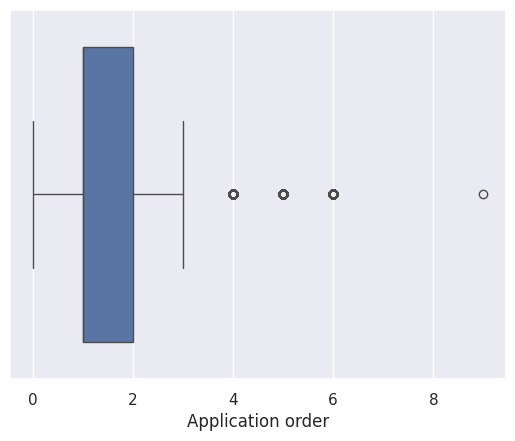

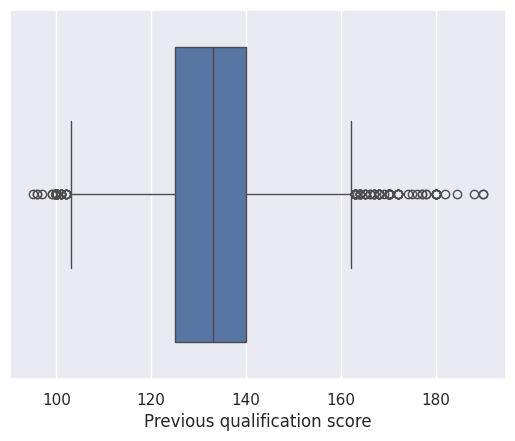

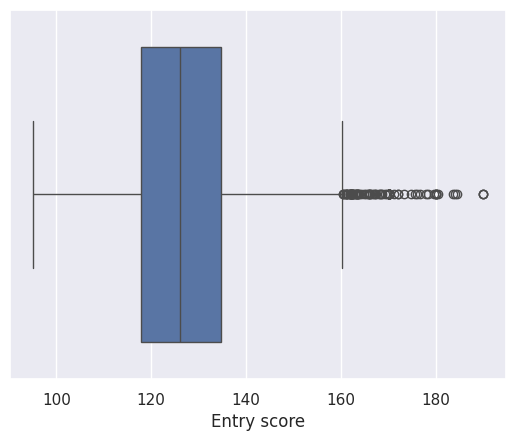

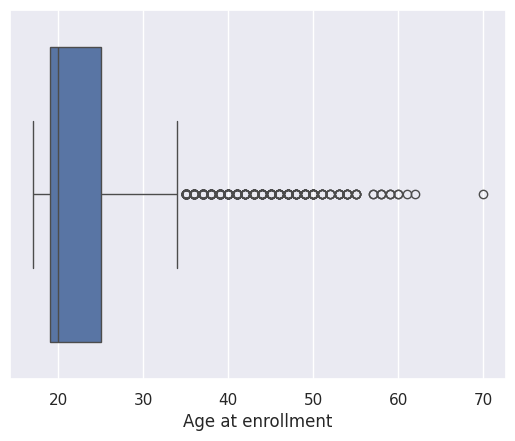

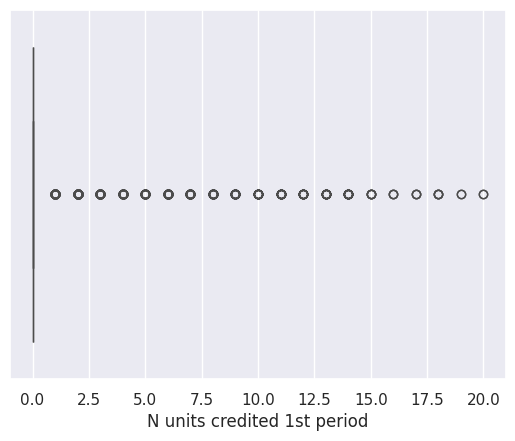

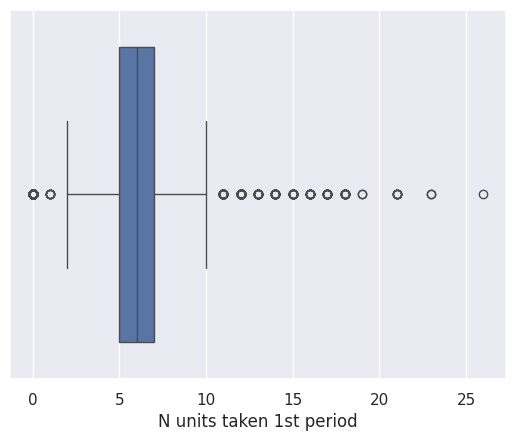

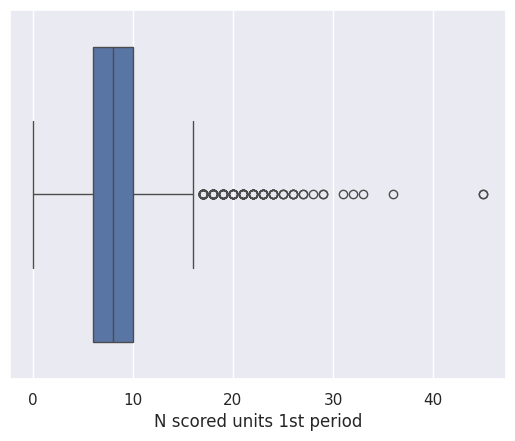

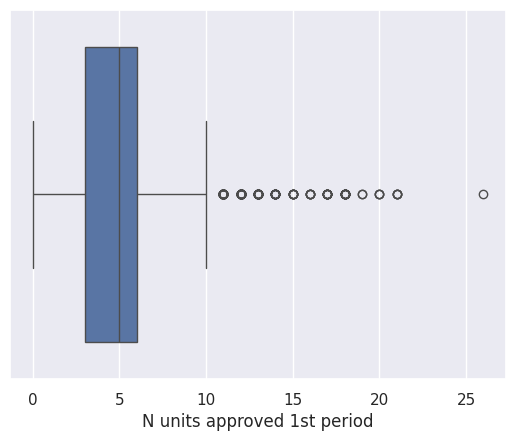

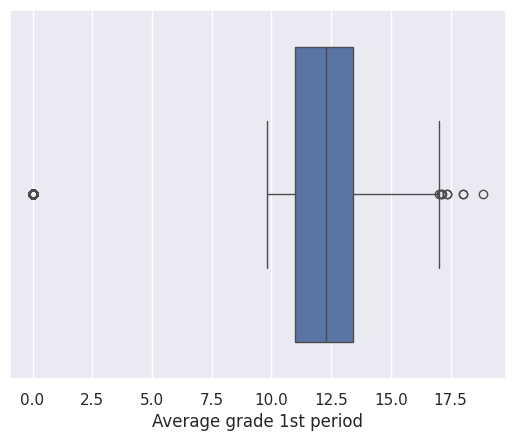

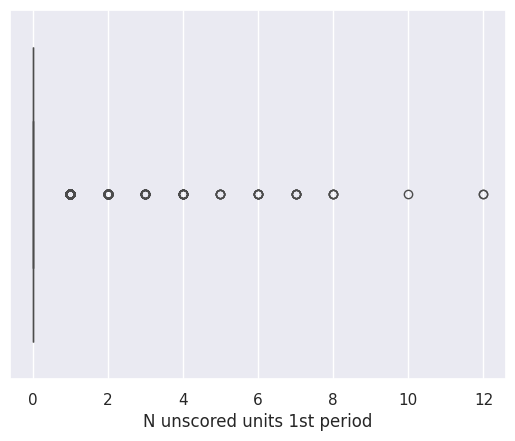

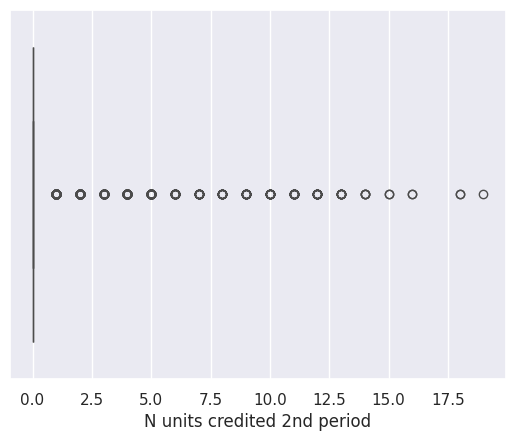

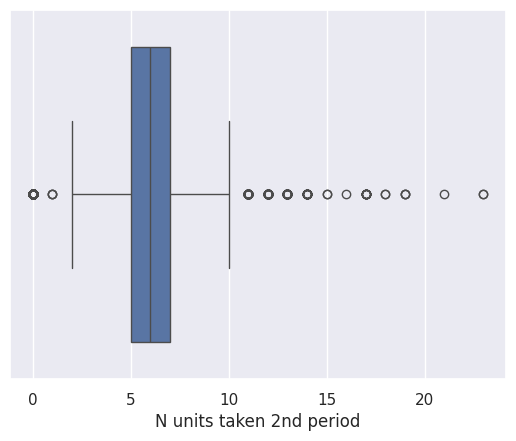

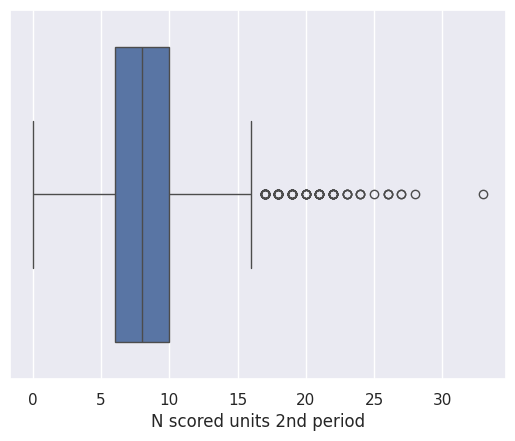

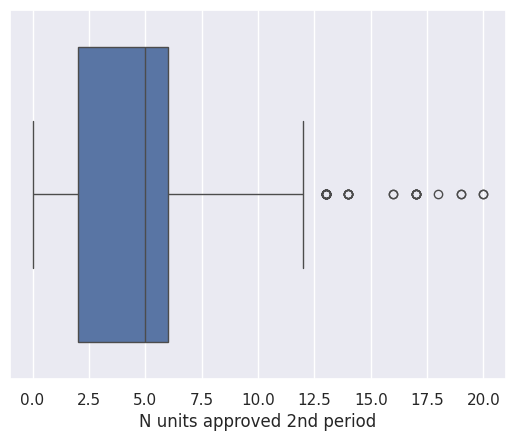

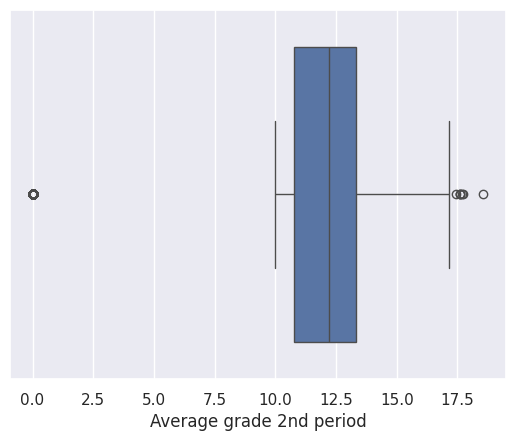

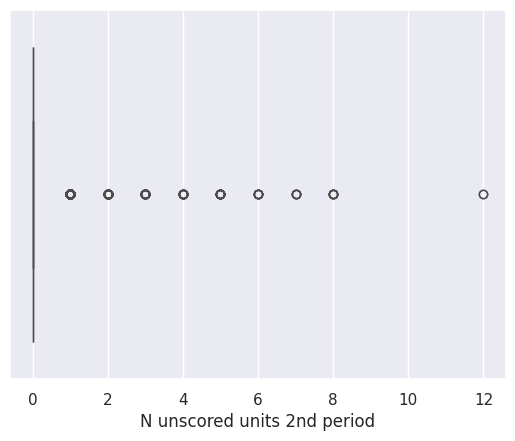

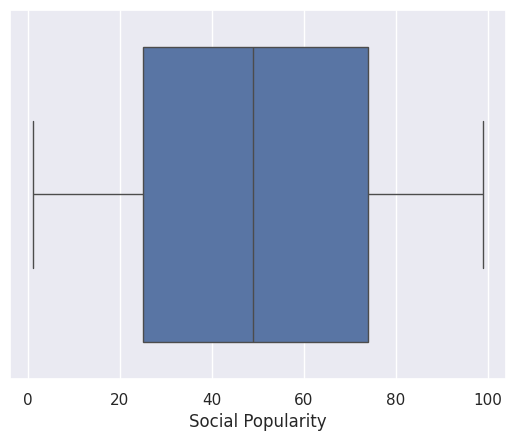

In [114]:
for i, col in enumerate(metricFeatures):
  plt.figure(i)
  sns.boxplot(x=col, data=dataDF)

In [115]:
# mn.matrix(data)

In [116]:
# percentage of empty values in a column
round(dataDF.isnull().sum() / dataDF.shape[0] * 100.00,2)

Marital status                  0.00
Application mode                1.99
Application order               1.99
Course                          0.00
Morning shift participation     1.99
Previous qualification          0.05
Previous qualification score    0.00
Nationality                     0.00
Mother's qualification          2.94
Father's qualification          2.62
Mother's occupation             0.38
Father's occupation             1.20
Entry score                     0.00
Displaced                       1.99
Special needs                   1.99
Debtor                          1.99
Regularized Fees                1.99
Gender_Male                     1.99
External Funding                1.99
Age at enrollment               1.99
International                   1.99
N units credited 1st period     1.99
N units taken 1st period        1.99
N scored units 1st period       1.99
N units approved 1st period     1.99
Average grade 1st period        0.00
N unscored units 1st period     1.99
N

# Preprocessing

In [117]:
def fillNa(data: pd.DataFrame) -> pd.DataFrame:
    """Fill missing values

    Args:
        data (`pd.DataFrame`): Dataframe to be treated

    Returns:
        `pd.DataFrame`: Treated dataframe
    """

    # on all of these features, if a value were to be different than 0, then it would not be missing, eg units approved, if the student approved, the value wouldn't be missing
    ifNaThen0: tuple[str,...] = (
        "N units credited 1st period",
        "N unscored units 1st period",
        "N scored units 1st period",
        "N units credited 2nd period",
        "N unscored units 2nd period",
        "N scored units 2nd period"
    )

    # these features are filled differently, basically incoherence checking, but filling the Na on 'N units approved 1st/2nd period' is needed beforehand, more info below
    checkAfterVars: list[list[str]] = [
        ["N units taken 1st period", "N scored units 1st period"],
        ["N units taken 2nd period", "N scored units 2nd period"]
    ]

    for var in metricFeatures:
        if var == (checkAfterVars[0][0] or checkAfterVars[1][0]):
            continue # skip current iteration
        if var in ifNaThen0:
            data[var] = data[var].fillna(0) # fill the ifNaThen0 vars with well, 0s
        else:
            data[var] = data[var].fillna(data[var].median()) # fill everything else with the median of the values of the feature

    # here we use the n units taken features we skipped earlier, a student has to have taken at least the same number of courses as the number of courses they passed
    for varList in checkAfterVars:
        # search for Na values on N units taken and replace by the equivalent value on N units approved
        data.loc[data[varList[0]].isna(), varList[0]] = data[varList[1]]
        # search for values on N units taken that are smaller than the equivalent on N units approved, replace by the equivalent value on N units approved
        data.loc[data[varList[0]] < data[varList[1]], varList[0]] = data[varList[1]]

    for var in boolFeatures:
        if var == "Regularized Fees":
            data[var] = data[var].fillna(1) # if nothing is said about the fees, we can assume they have been paid
        else:
            data[var] = data[var].fillna(0) # here is like the ifNaThen0 situation, if the values were to not be 0, they would have been declared

    return data

In [118]:
def removeOutliers(data: pd.DataFrame) -> pd.DataFrame:
    """Removes outliers and fixes any negative number incoherences on the selected variables from the dataframe

    Args:
        data (`pd.DataFrame`): Dataframe to be treated

    Returns:
        `pd.DataFrame`: Treated dataframe
    """

    toBeTreated: dict[str, dict[str, float | None]] = {
        "Application order": {"lower": 0, "upper": None},
        "Previous qualification score": {"lower": 0, "upper": None},
        "Entry score": {"lower": 0, "upper": None},
        "Age at enrollment": {"lower": 0, "upper": None},
        "N units credited 1st period": {"lower": 0, "upper": 15},
        "N units taken 1st period": {"lower": 0, "upper": 20},
        "N scored units 1st period": {"lower": 0, "upper": 25},
        "N units approved 1st period": {"lower": 0, "upper": 20},
        "Average grade 1st period": {"lower": 0, "upper": None},
        "N unscored units 1st period": {"lower": 0, "upper": None},
        "N units credited 2nd period": {"lower": 0, "upper": 14},
        "N units taken 2nd period": {"lower": 0, "upper": 15},
        "N scored units 2nd period": {"lower": 0, "upper": 25},
        "N units approved 2nd period": {"lower": 0, "upper": 15},
        "Average grade 2nd period": {"lower": 0, "upper": None},
        "N unscored units 2nd period": {"lower": 0, "upper": None},
        "Social Popularity": {"lower": 0, "upper": 100},
    }

    for var in toBeTreated:
        if toBeTreated[var]["lower"] != None:
            toRemove: list = list(data.loc[data[var] < toBeTreated[var]["lower"], var].index)
        if toBeTreated[var]["upper"] != None:
            toRemove.extend(list(data.loc[data[var] > toBeTreated[var]["upper"], var].index))
        data.drop(toRemove, axis=0, inplace=True)

    return data

In [119]:
def groupValues(data: pd.DataFrame) -> pd.DataFrame:
    """replace values on columns that have lots of different values that can be grouped together to reduce the total number of dummies created after

    Args:
        data (`pd.DataFrame`): Dataframe to be treated

    Returns:
        `pd.DataFrame`: Treated dataframe
    """

    # for col in ["Mother's qualification",  "Father's qualification", "Previous qualification"]:
    #     data.replace(regex={col: {r"(?i)^no school.*$": '0',
    #                         r"(?i)^[0-4][a-z]{2} grade.*$": '1',
    #                         r"(?i)^[5-9]th grade.*$": '2',
    #                         r"(?i)^1[0-2]th grade.*$": '3',
    #                         r"(?i)^incomplete bachelor.*$": '4',
    #                         r"(?i)^bachelor degree.*$": '5',
    #                         r"(?i)^post-grad.*$": '6',
    #                         r"(?i)^master degree.*$": '7',
    #                         r"(?i)^phd.*$": '8',}}, inplace=True)
    education={
        '12th grade':'Middle',
        '9th grade':'Middle',
        '11th grade':'Middle',
        '12th grade - Technological specialization course':'Middle',
        '10th grade':'Middle',
        '12th grade - Technical-professional course':'Middle',
        '4th grade':'Lower',
        '6th grade':'Lower',
        '8th grade':'Lower',
        '3rd grade':'Lower',
        'Bachelor degree':'Higher',
        'Master degree':'Higher',
        'PhD':'Higher',
        'Post-Graduation':'Higher',
        'Incomplete Bachelor\'s':'Higher',
        'No School': 'None'
      }

    data['Father\'s qualification'].replace(education,inplace=True)
    data['Mother\'s qualification'].replace(education,inplace=True)
    data['Previous qualification'].replace(education,inplace=True)

    for col in ["Mother's occupation", "Father's occupation"]:
          data.replace(to_replace={col: ["Superior-level Professional", "Intermediate-level Professional", "Politician/CEO", "Teacher", "Information Technology Specialist"]}, value="Professional Fields", inplace=True)
          data.replace(to_replace={col: ["Skilled construction workers", "Assembly Worker", "Factory worker", "Lab Technocian"]}, value="Technical and Skilled Trades", inplace=True)
          data.replace(to_replace={col: ["Administrative Staff", "Office worker", "Accounting operator"]}, value="White collar Jobs", inplace=True)
          data.replace(to_replace={col: ["Restaurant worker", "Personal care worker", "Seller", "Cleaning worker"]}, value="Service Industry", inplace=True)
          data.replace(to_replace={col: ["Private Security", "Armed Forces"]}, value="Security and Armed Forces", inplace=True)
          data.replace(to_replace={col: ["Unskilled Worker", "Other", "Student", "Artist"]}, value="Recreational or unskilled", inplace=True)
          data.replace(to_replace={col: ["Engineer", "Scientist", "Health professional"]}, value="STEM Jobs", inplace=True)

    data.replace(to_replace={"Marital status": {
        'single':'alone',
        'divorced':'alone',
        'legally separated':'alone',
        'widower':'alone',
        'married':'together',
        'facto union':'together'
    }}, inplace=True)

    return data

In [120]:
def getDummies(data: pd.DataFrame) -> pd.DataFrame:
    """get dummies

    Args:
        train (`pd.DataFrame`): Train dataframe to be treated

    Returns:
        `pd.DataFrame` : treated dataframe
    """

    data = pd.get_dummies(data=data, prefix_sep="-", dummy_na=True, drop_first=False)

    return data

In [121]:
def scaleData(data: pd.DataFrame) -> pd.DataFrame:
    """Tranforms the values in the dataframe to fit in a scale of 0 to 1

    Args:
        train (pd.DataFrame): Unscaled train dataframe

    Returns:
        pd.DataFrame: Scaled dataframe
    """

    scaler = MinMaxScaler()
    scaler.fit(data)

    data = pd.DataFrame(scaler.transform(data), columns = data.columns, index = data.index)

    return data

In [122]:
def encodeSuccess(successData: pd.DataFrame) -> pd.DataFrame:
    """Replace string values on success by integers

    Args:
        successData (pd.DataFrame): Untreated dataframe

    Returns:
        pd.DataFrame: Treated dataframe
    """
    successData.replace({'Success': {"Gave up": 0, "Holding on": 1, "Succeeded": 2}}, inplace=True)

    return successData

In [123]:
def prepData(data: pd.DataFrame) -> tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame]:
    """Runs the preprocessing steps on the dataframe

    Args:
        data (pd.DataFrame): Un-preprocessed data dataframe

    Returns:
        pd.DataFrame: Treated dataframe
    """

    data = encodeSuccess(data)
    data = fillNa(data)
    data = removeOutliers(data)
    data = groupValues(data)
    dataAcademic: pd.DataFrame = data[academicFeatures]
    dataDemographic: pd.DataFrame = data[demographicFeatures]
    dataAcademic = getDummies(dataAcademic)
    dataDemographic = getDummies(dataDemographic)
    dataAcademic = scaleData(dataAcademic)
    dataDemographic = scaleData(dataDemographic)
    data = getDummies(data)
    data = scaleData(data)

    return data, dataAcademic, dataDemographic

# Feature Selection

In [124]:
def pairPlots(data: pd.DataFrame,fileName: str) -> None:
    sns.pairplot(data.sample(1000)).savefig(f"./output/{fileName}.png")

# Feature engineering

In [125]:
def addAverages(data):
  data['Average grades']=(data['Average grade 1st period']+data['Average grade 2nd period'])/2
  data['Average units taken']=(data['N units taken 1st period']+data['N units taken 2nd period'])/2
  data['Average scored units']=(data['N scored units 1st period']+data['N scored units 2nd period'])/2
  data['Average units approved']=(data['N units approved 1st period']+data['N units approved 2nd period'])/2
  data['Average units credited']=(data['N units credited 1st period']+data['N units credited 2nd period'])/2
  data['Average unscored units']=(data['N unscored units 1st period']+data['N unscored units 2nd period'])/2

  data['Unit load']=data['N units credited 1st period']+data['N units credited 2nd period']

In [126]:
# data['Average grades']=(data['Average grade 1st period']+data['Average grade 2nd period'])/2
# data['Average units taken']=(data['N units taken 1st period']+data['N units taken 2nd period'])/2
# data['Average scored units']=(data['N scored units 1st period']+data['N scored units 2nd period'])/2
# data['Average units approved']=(data['N units approved 1st period']+data['N units approved 2nd period'])/2
# data['Average units credited']=(data['N units credited 1st period']+data['N units credited 2nd period'])/2
# data['Average unscored units']=(data['N unscored units 1st period']+data['N unscored units 2nd period'])/2

# data['Unit load']=data['N units credited 1st period']+data['N units credited 2nd period']

In [127]:
# dataDF['Average grades']=(dataDF['Average grade 1st period']+dataDF['Average grade 2nd period'])/2
# dataDF['Average units taken']=(dataDF['N units taken 1st period']+dataDF['N units taken 2nd period'])/2
# dataDF['Average scored units']=(dataDF['N scored units 1st period']+dataDF['N scored units 2nd period'])/2
# dataDF['Average units approved']=(dataDF['N units approved 1st period']+dataDF['N units approved 2nd period'])/2
# dataDF['Average units credited']=(dataDF['N units credited 1st period']+dataDF['N units credited 2nd period'])/2
# dataDF['Average unscored units']=(dataDF['N unscored units 1st period']+dataDF['N unscored units 2nd period'])/2

# dataDF['Unit load']=dataDF['N units credited 1st period']+dataDF['N units credited 2nd period']

# SOM function

In [128]:
def somFunc(df_som,rows,cols,umat=False,componentPlanes=False,componentColumns=[]):
  mapsize=[rows,cols]
  som = SOMFactory().build(df_som, mapsize, mask=None,
                         mapshape='planar', # 2Dimensions
                         lattice='rect', # topology: 'rect' or 'hexa'
                         normalization='var', # standardize the variables
                         initialization='pca', # initialization of the weights: 'pca' or 'random'
                         neighborhood='gaussian', # neighborhood function: 'gaussian' or 'bubble'
                         training='batch') # training mode: 'seq' or 'batch'
  som.train(n_job=1, verbose=False, train_rough_len=3, train_finetune_len=5)

  if umat == True:
    u = sompy.umatrix.UMatrixView(rows, cols, title='U-matrix', show_axis=True, text_size=8, show_text=True)

  #This is the Umat value
  UMAT  = u.build_u_matrix(som, distance=1, row_normalized=False)

  #Here you have Umatrix plus its render
  _, umat = u.show(som, distance=1, row_normalized=True, contour=True, blob=False)

  if componentPlanes == True:
    som.component_names = componentColumns
    comp_planes = sompy.mapview.View2DPacked(rows, cols, 'Component Planes', text_size=8)
    comp_planes.show(som, what='codebook', which_dim='all', col_sz=8)

  return som

In [129]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)

    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)

        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        color = sns.color_palette('Dark2')

        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label, color=color, ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1], palette = color)

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=16, fontweight = 'heavy')
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=16)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=16)


    plt.subplots_adjust(hspace=0.4, top=0.90, bottom = 0.2)
    plt.suptitle("Cluster Profiling", fontsize=23)
    plt.show()

#AcademData

In [167]:
dataDF = fillNa(dataDF)
addAverages(dataDF)

In [168]:
academicData=['Entry score','Average scored units','Average grades','Average units taken','Average units approved','Average units credited','Average unscored units','Success']

In [169]:
data = encodeSuccess(dataDF)
# data = fillNa(data)
data = removeOutliers(data)
data = groupValues(data)
dataAcademicDF = data[academicData]
dataAcademic = getDummies(dataAcademicDF)
dataAcademic = scaleData(dataAcademicDF)
data = getDummies(data)
data = scaleData(data)
dataAcademicDF=scaleData(dataAcademicDF)

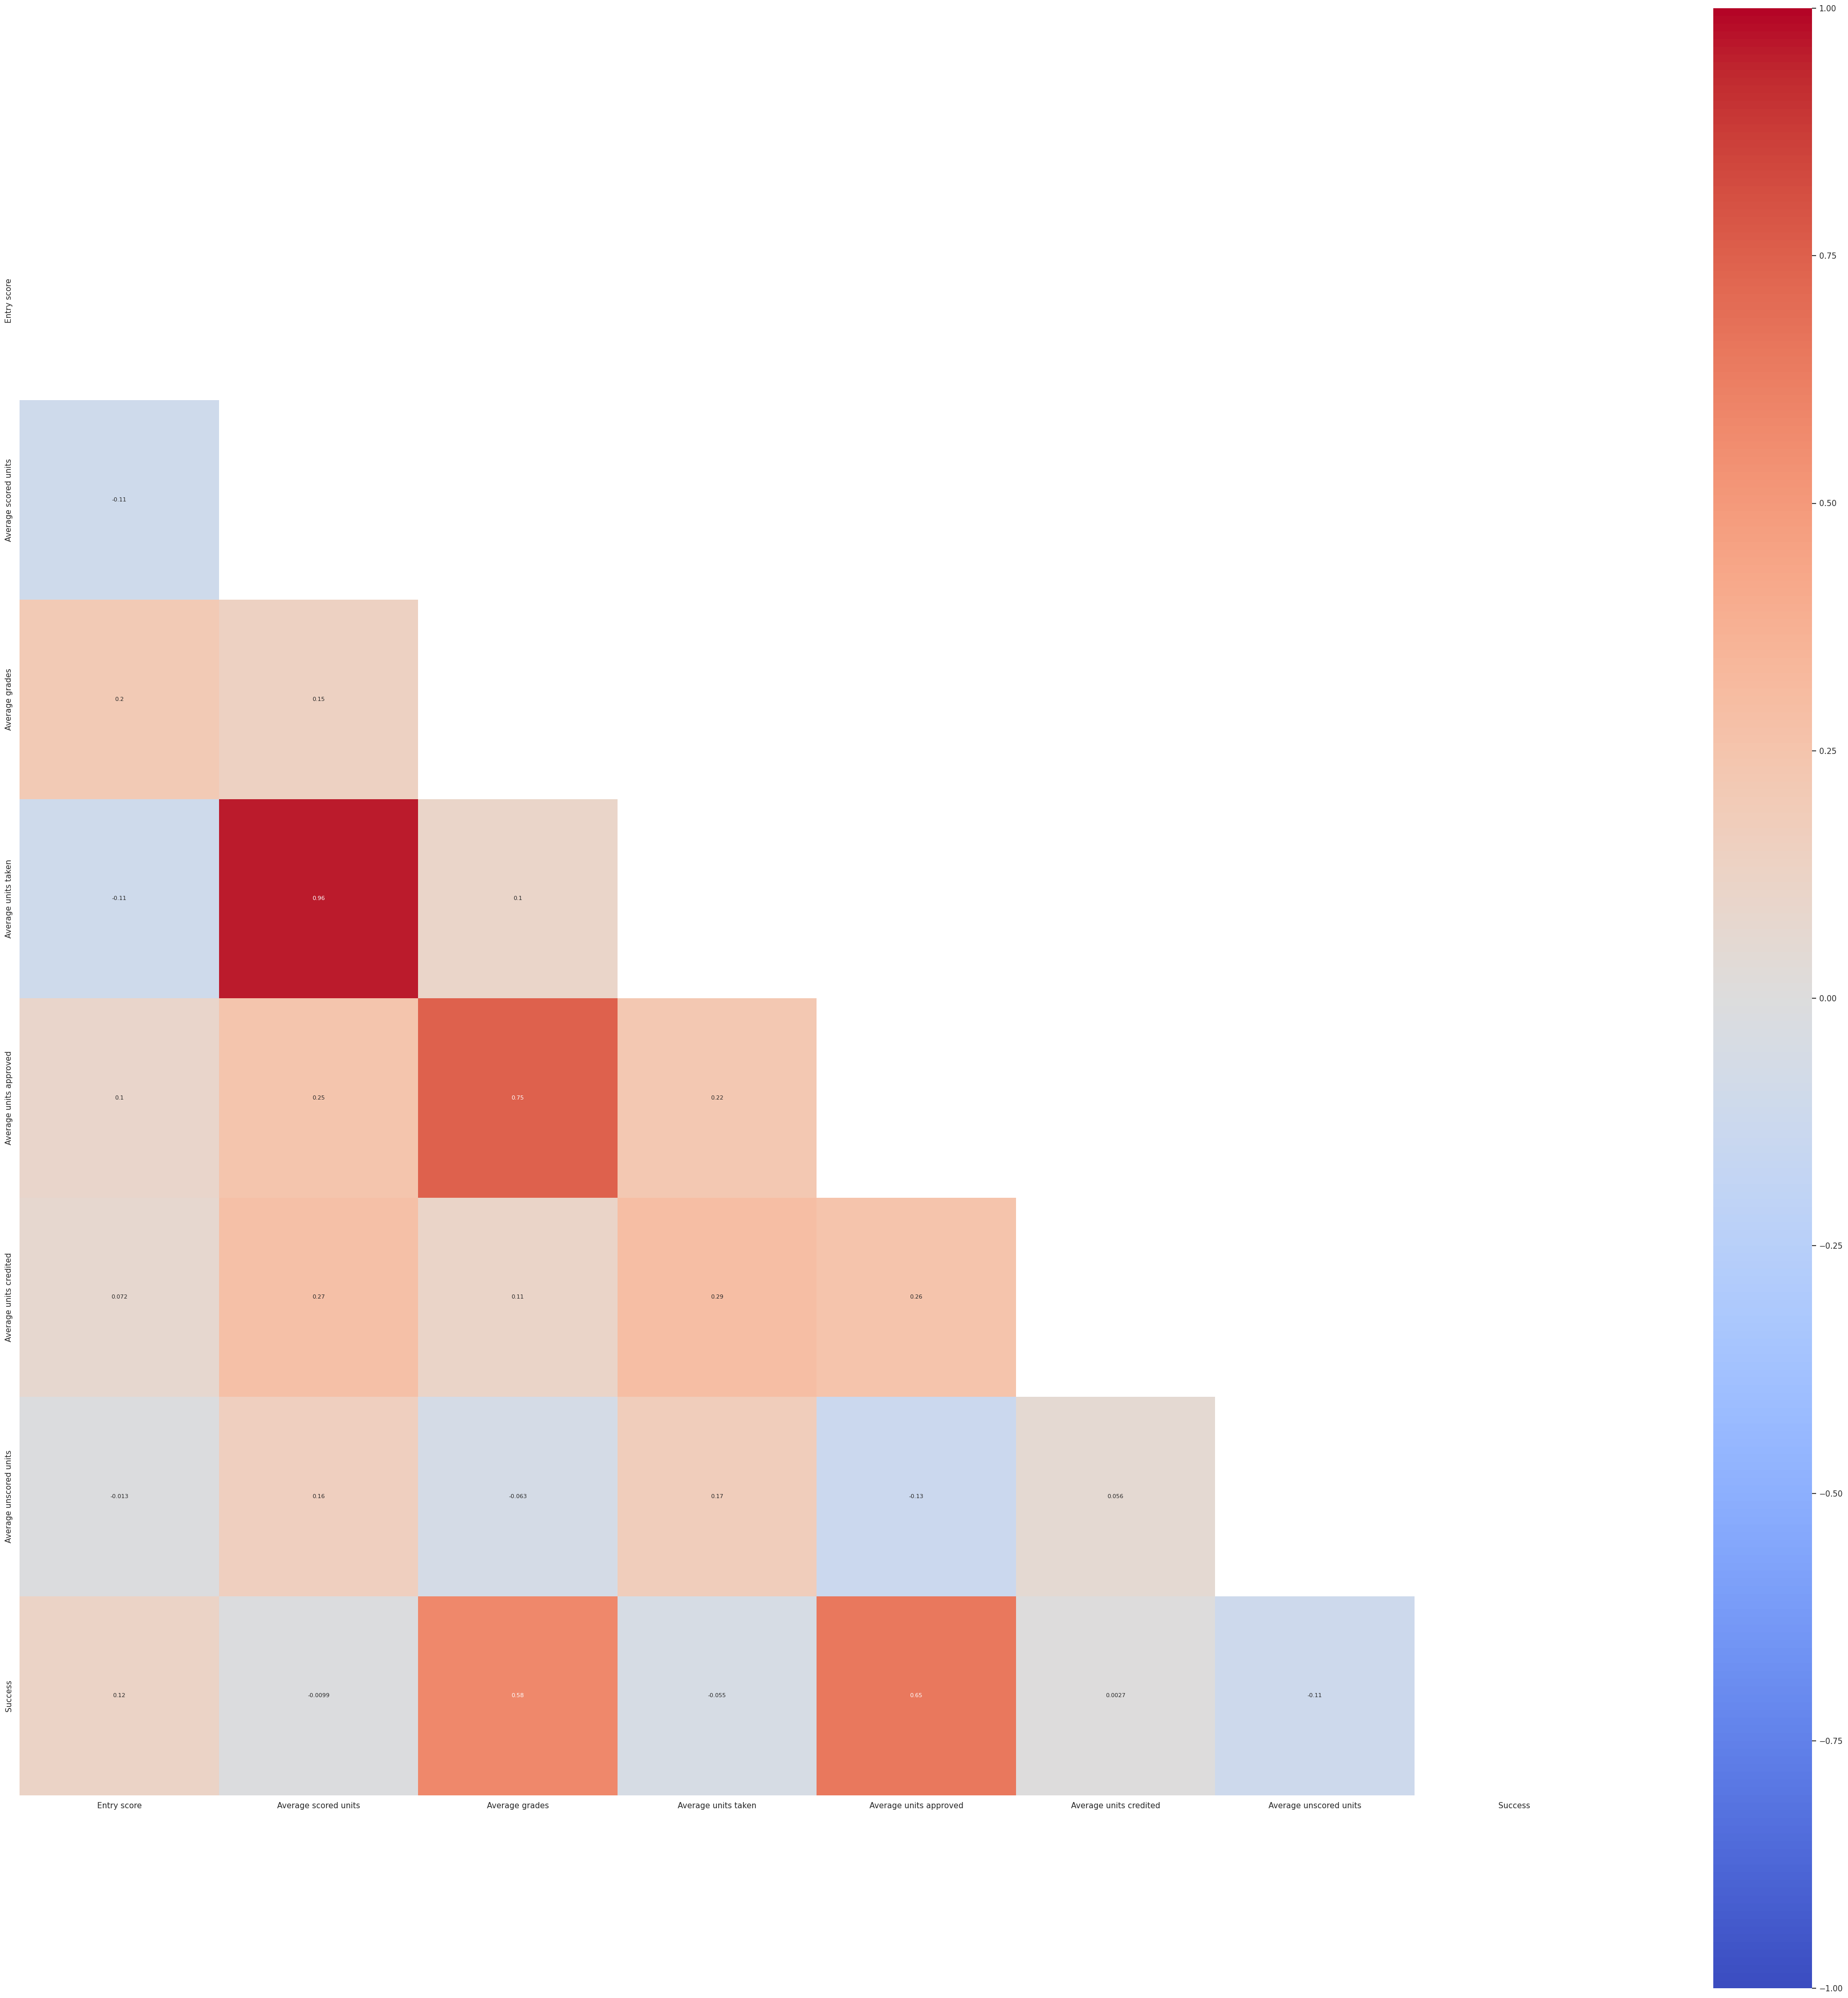

In [170]:
mask = np.zeros_like(dataAcademicDF.corr("spearman"))
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(50,50))
    ax = sns.heatmap(dataAcademicDF.corr("spearman"),mask=mask, annot = True,cmap='coolwarm',square=True,vmin=-1, vmax=1)

In [171]:
cor_spearman = dataAcademicDF[dataAcademicDF.columns].corr(method='spearman')
cor_spearman

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
# display only highly correlated (>=80%) features
threshold=0.8

mask = cor_spearman.abs() > threshold

high_cor = cor_spearman[mask].stack().reset_index()
high_cor.columns = ['Feature 1', 'Feature 2', 'Correlation']

# filter out where Feature1==Feature2
mask = high_cor['Feature 1'] == high_cor['Feature 2']
high_cor_filtered = high_cor[~mask]

high_cor_filtered

Feature 1             Feature 2  Correlation
2  Average scored units   Average units taken     0.958202
4   Average units taken  Average scored units     0.958202

In [172]:
dataAcademicDF.drop('Average units taken',axis=1,inplace=True)
academicData.remove('Average units taken')

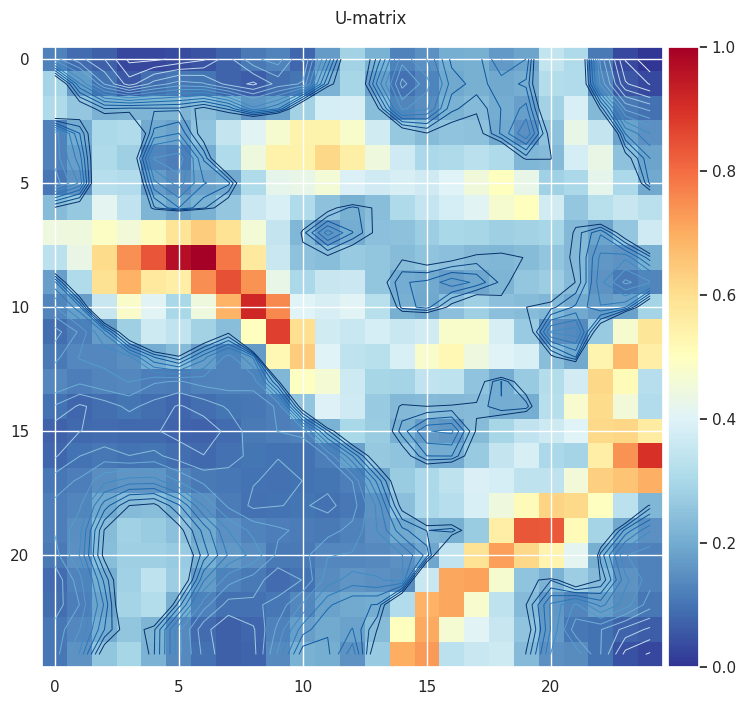

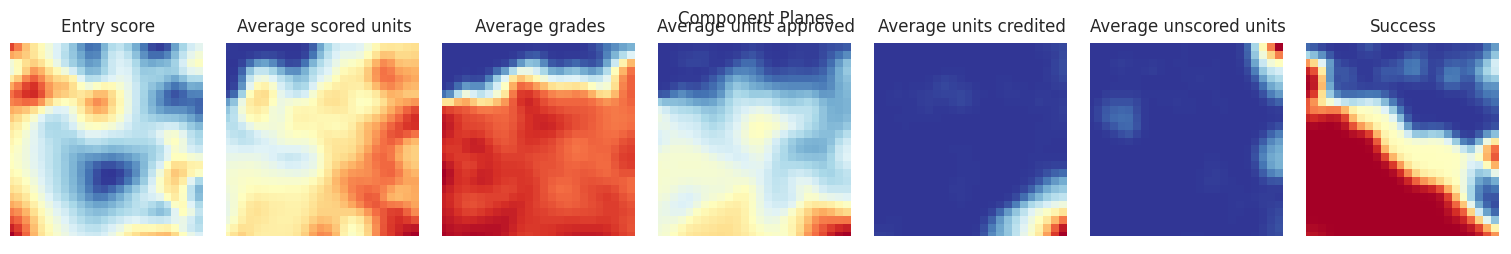

In [173]:
som=somFunc(np.float32(dataAcademicDF),25,25,True,True,dataAcademicDF.columns)

In [174]:
# cl = som.cluster(n_clusters=4)
bmus = som.project_data(dataAcademicDF)
som.cluster(n_clusters=3)
labels = getattr(som, 'cluster_labels')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


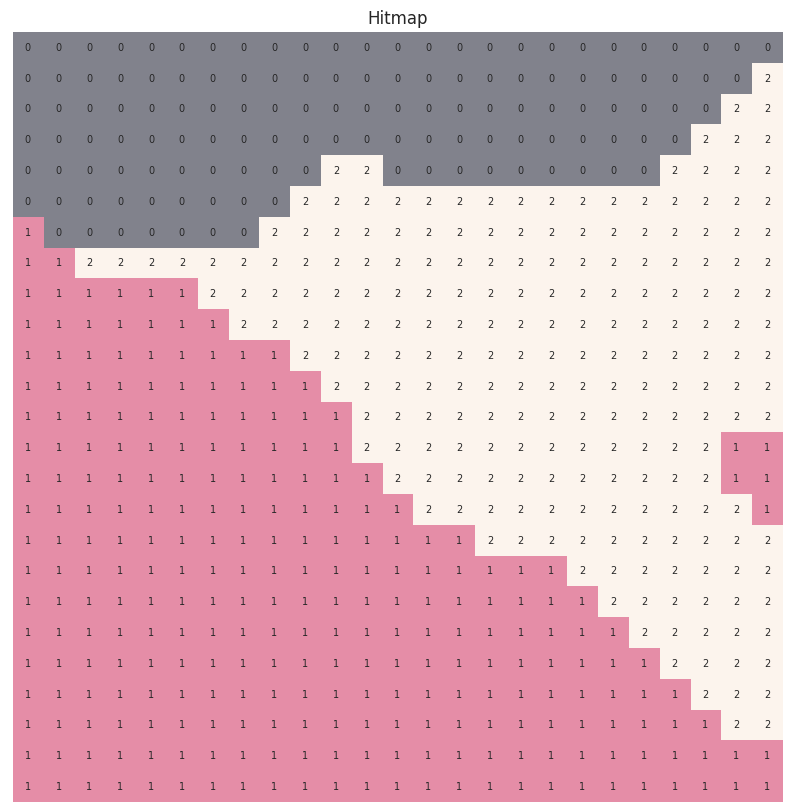

In [175]:
h = sompy.hitmap.HitMapView(10, 10, 'Hitmap', text_size=8, show_text=True)
h.show(som)

In [176]:
dataAcademicDF['bmu'] = bmus
dataAcademicDF['label'] = labels[dataAcademicDF['bmu']]

academicResults=dataDF.copy(deep=True)
academicResults['label']=dataAcademicDF['label']

<ipython-input-129-8dc2189a8ab8>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label, y="counts", data=counts, ax=ax[1], palette = color)
<ipython-input-129-8dc2189a8ab8>:19: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.barplot(x=label, y="counts", data=counts, ax=ax[1], palette = color)
<ipython-input-129-8dc2189a8ab8>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(cluster_labels)


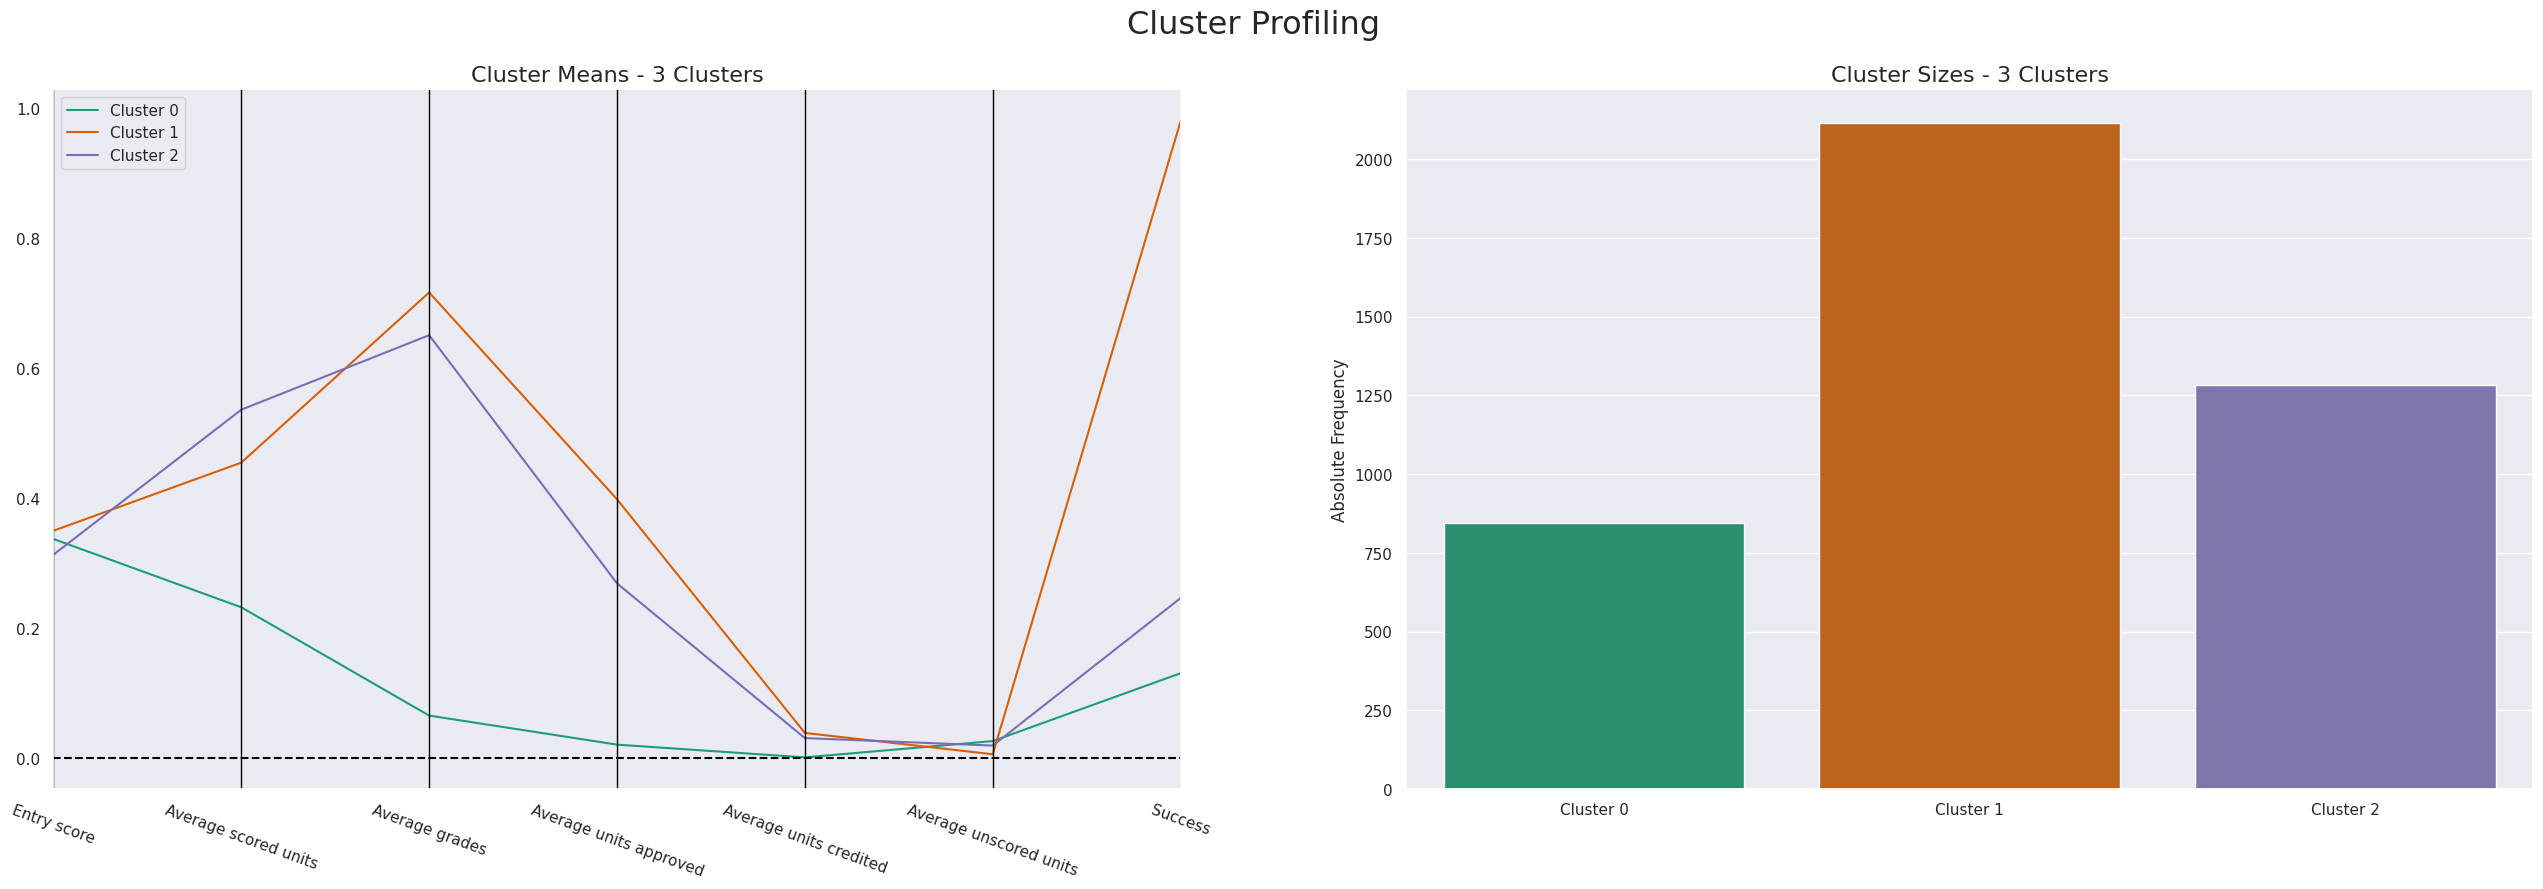

In [177]:
cluster_profiles(dataAcademicDF[academicData].join(dataAcademicDF['label']),["label"],figsize=(32, 10))

  0%|          | 0/7 [00:00<?, ?it/s]

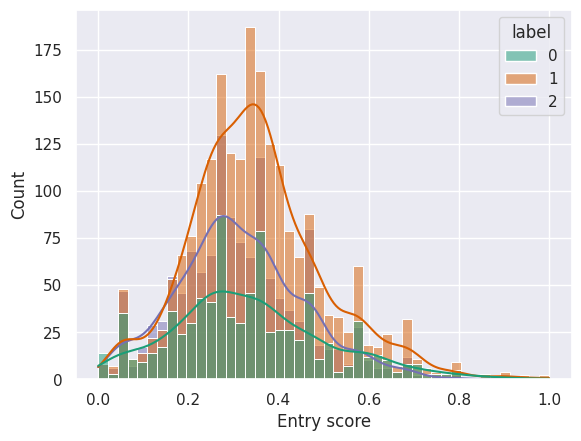

 14%|█▍        | 1/7 [00:00<00:04,  1.40it/s]

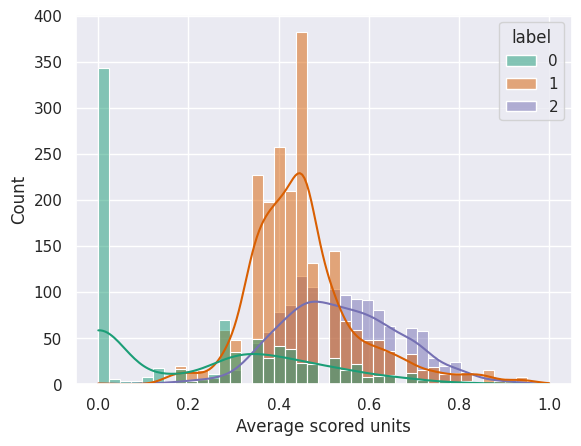

 29%|██▊       | 2/7 [00:01<00:03,  1.42it/s]

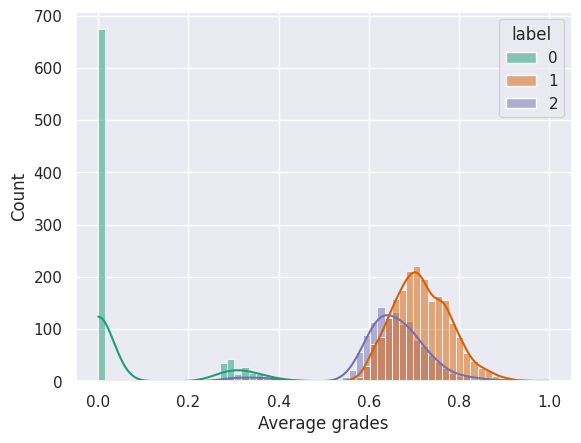

 43%|████▎     | 3/7 [00:02<00:02,  1.34it/s]

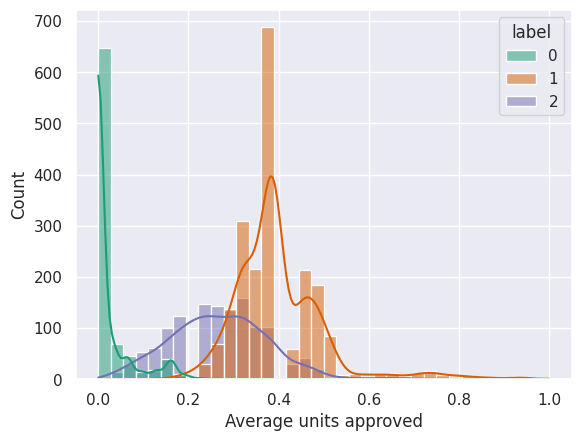

 57%|█████▋    | 4/7 [00:02<00:02,  1.40it/s]

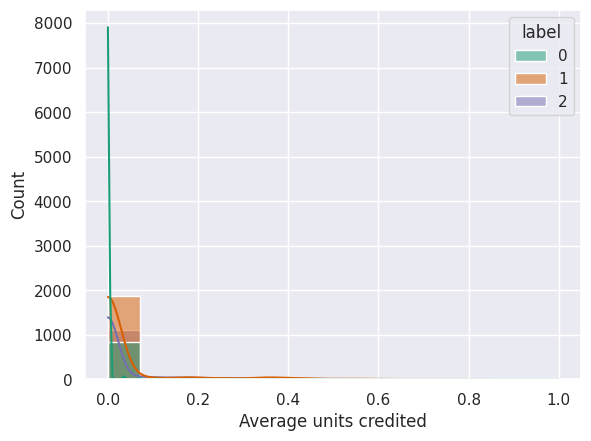

 71%|███████▏  | 5/7 [00:03<00:01,  1.54it/s]

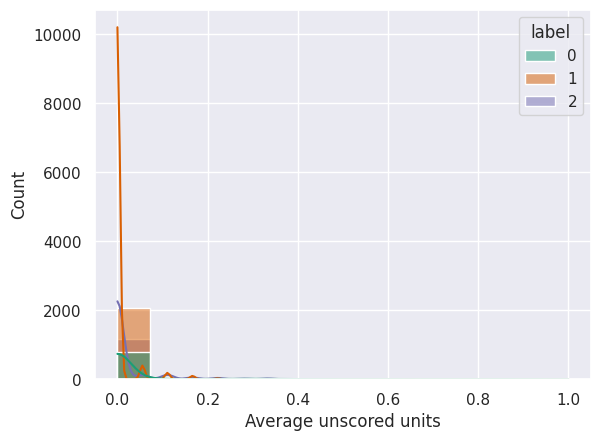

 86%|████████▌ | 6/7 [00:03<00:00,  1.63it/s]

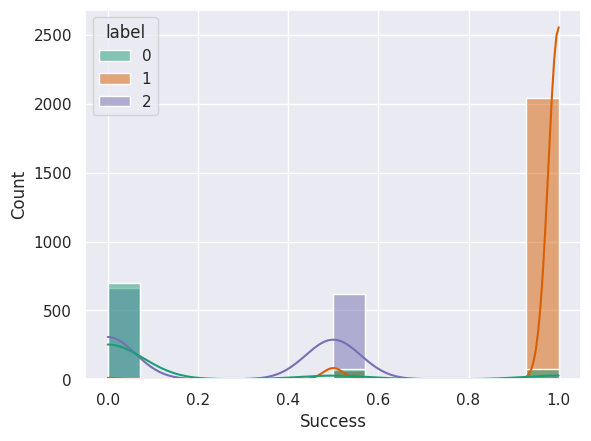

100%|██████████| 7/7 [00:04<00:00,  1.50it/s]


In [178]:
for i in tqdm(dataAcademicDF[academicData].columns):
    sns.histplot(dataAcademicDF, x = i, hue='label', kde = True, legend = True, palette = 'Dark2')
    plt.show()

In [179]:
academicData.remove('Average unscored units')
academicData.remove('Average units credited')

In [180]:
data = encodeSuccess(dataDF)
data = fillNa(data)
data = removeOutliers(data)
data = groupValues(data)
dataAcademicDF = data[academicData]
dataAcademic = getDummies(dataAcademicDF)
dataAcademic = scaleData(dataAcademicDF)
data = getDummies(data)
data = scaleData(data)
dataAcademicDF=scaleData(dataAcademicDF)

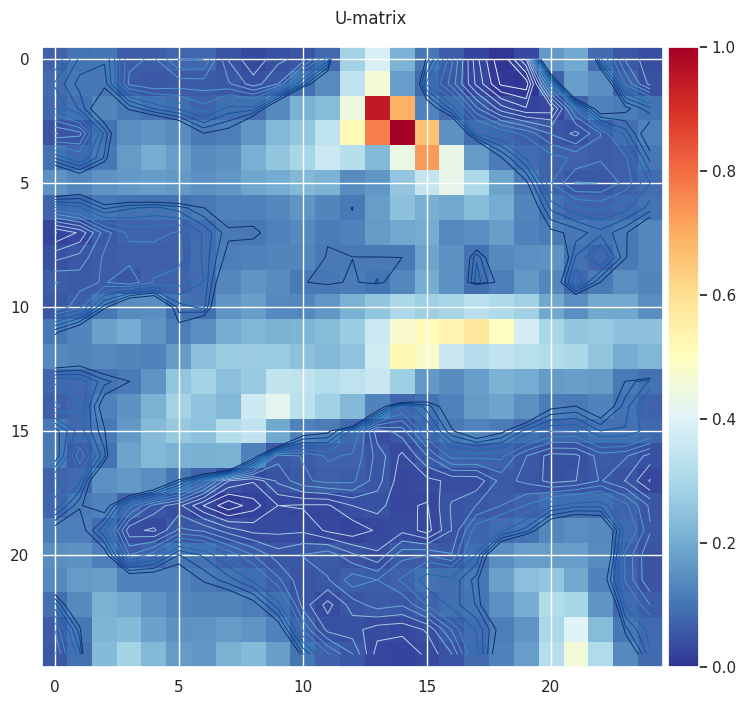

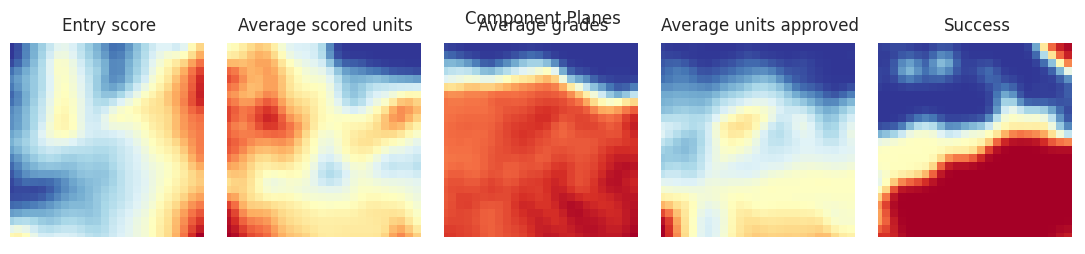

In [181]:
som=somFunc(np.float32(dataAcademicDF),25,25,True,True,dataAcademicDF.columns)

In [186]:
dataAcademicDF['bmu'] = bmus
dataAcademicDF['label'] = labels[dataAcademicDF['bmu']]

academicResults=dataDF.copy(deep=True)
academicResults['label']=dataAcademicDF['label']

<ipython-input-129-8dc2189a8ab8>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label, y="counts", data=counts, ax=ax[1], palette = color)
<ipython-input-129-8dc2189a8ab8>:19: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.barplot(x=label, y="counts", data=counts, ax=ax[1], palette = color)
<ipython-input-129-8dc2189a8ab8>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(cluster_labels)


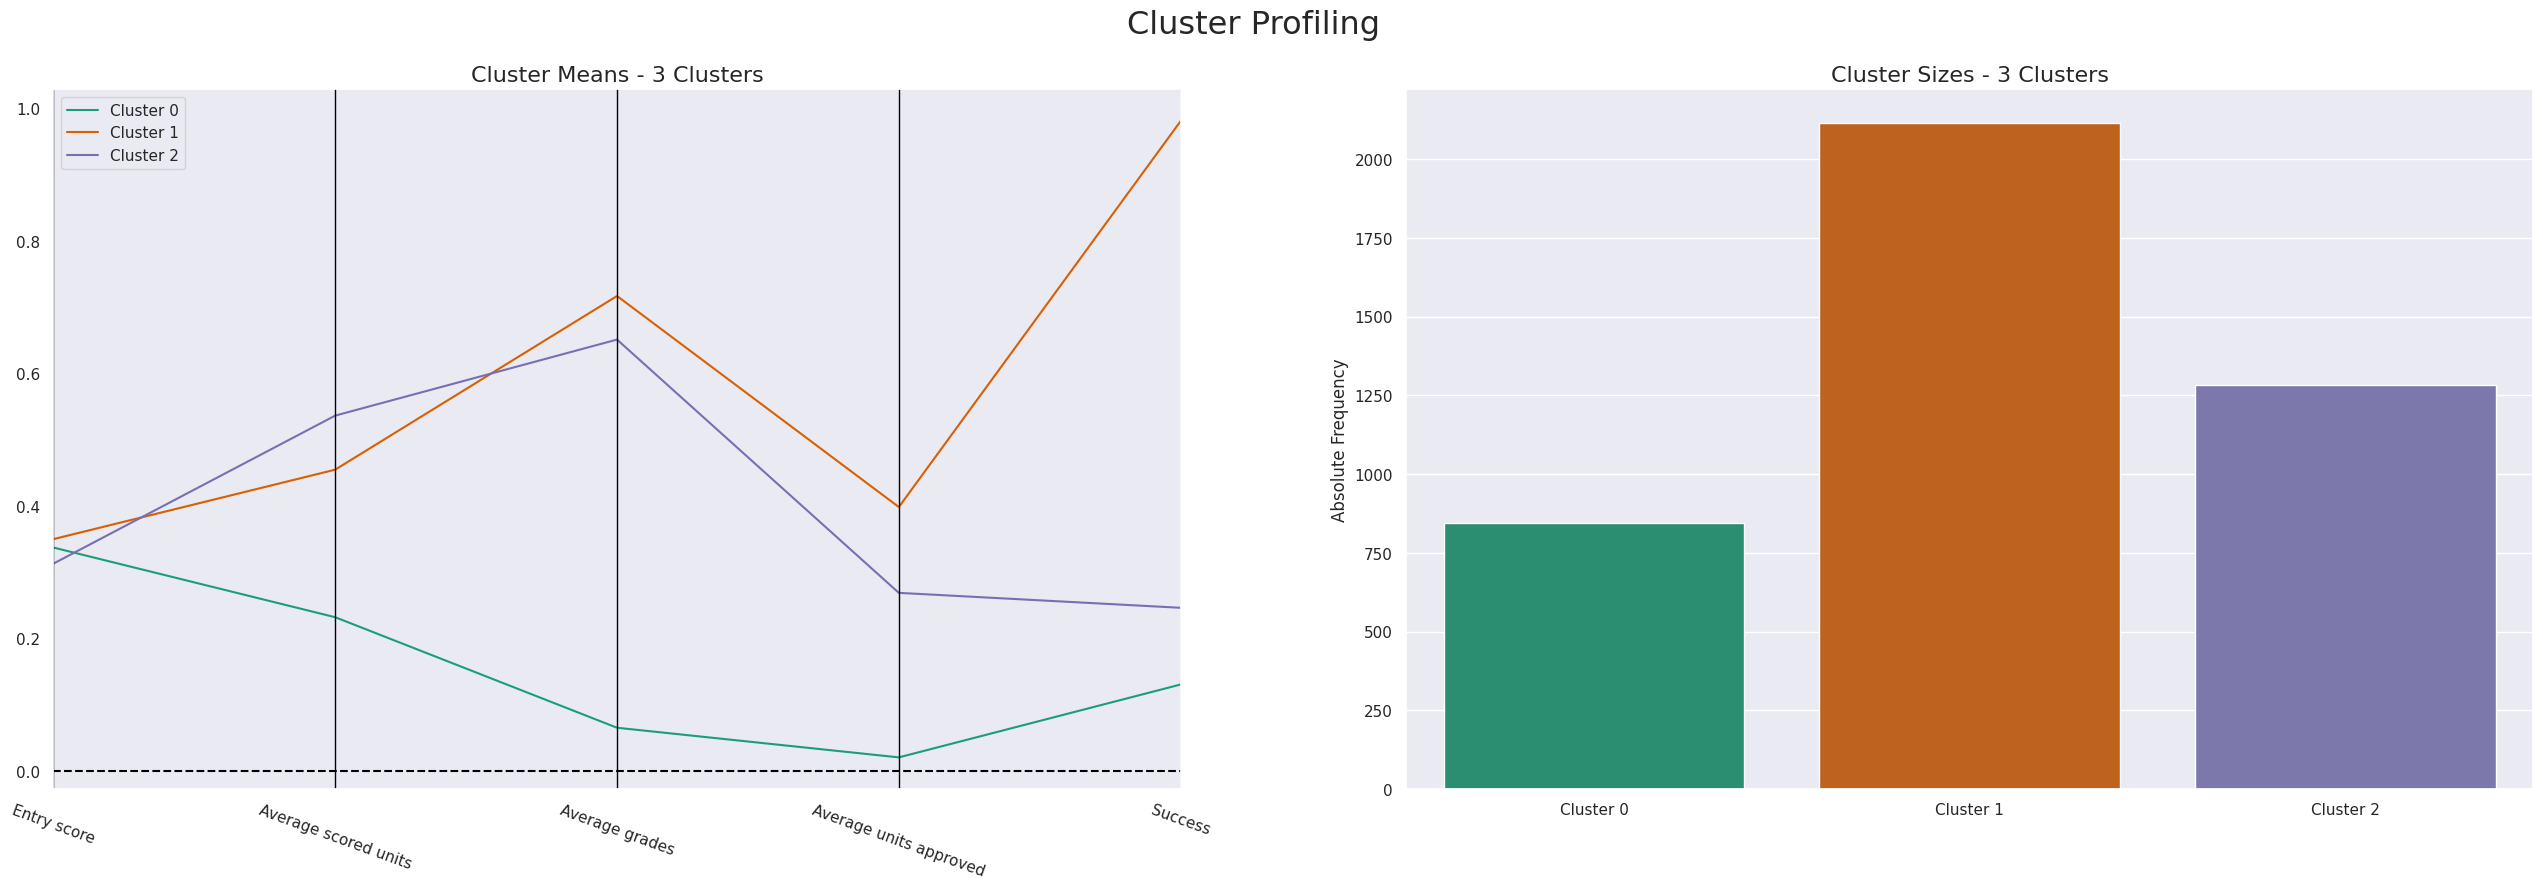

In [187]:
cluster_profiles(dataAcademicDF[academicData].join(dataAcademicDF['label']),["label"],figsize=(32, 10))

  0%|          | 0/5 [00:00<?, ?it/s]

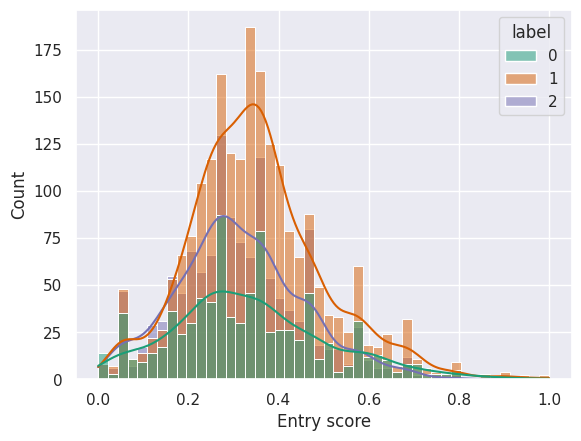

 20%|██        | 1/5 [00:01<00:04,  1.02s/it]

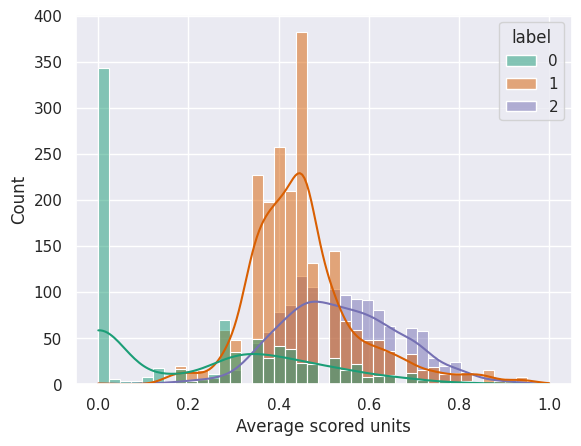

 40%|████      | 2/5 [00:01<00:02,  1.02it/s]

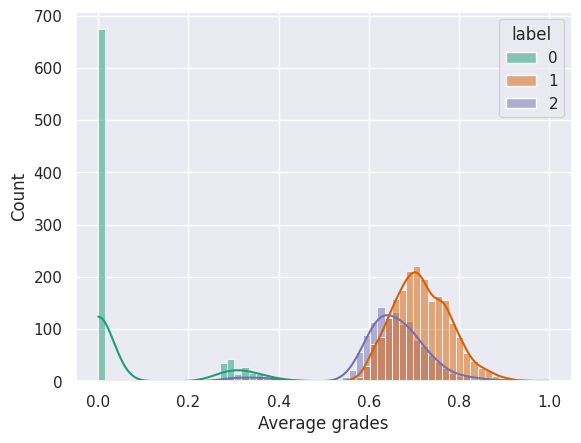

 60%|██████    | 3/5 [00:03<00:02,  1.08s/it]

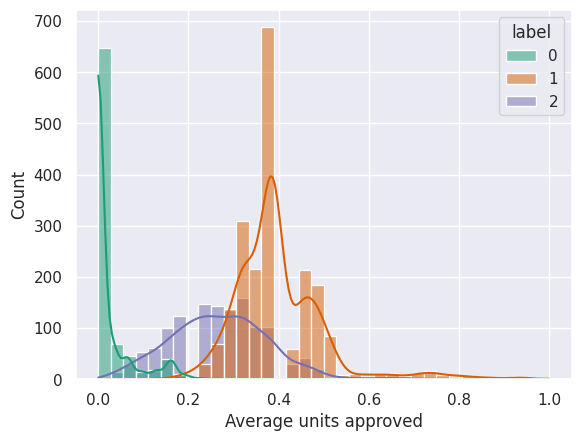

 80%|████████  | 4/5 [00:04<00:01,  1.19s/it]

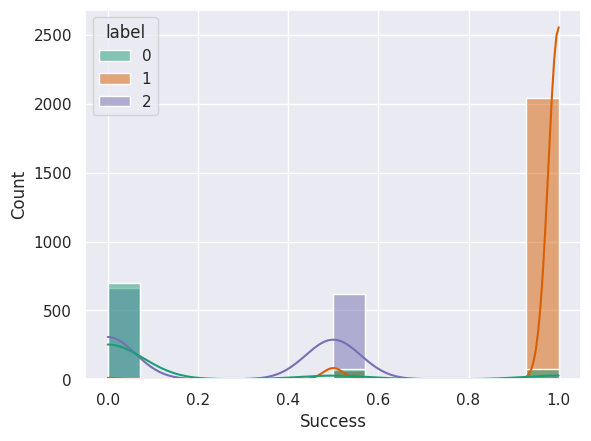

100%|██████████| 5/5 [00:05<00:00,  1.00s/it]


In [184]:
for i in tqdm(dataAcademicDF[academicData].columns):
    sns.histplot(dataAcademicDF, x = i, hue='label', kde = True, legend = True, palette = 'Dark2')
    plt.show()

In [185]:
academicResults[academicData+['label']].groupby(['label']).describe().T

label                                  0            1            2
Entry score            count  845.000000  2116.000000  1284.000000
                       mean   127.053373   128.256096   124.745249
                       std     16.512983    14.088375    13.284646
                       min     95.000000    95.000000    95.000000
                       25%    116.500000   119.375000   116.075000
                       50%    125.800000   127.000000   123.600000
                       75%    137.000000   135.800000   132.150000
                       max    190.000000   190.000000   180.400000
Average scored units   count  845.000000  2116.000000  1284.000000
                       mean     4.064497     7.960302     9.387461
                       std      3.962836     2.199900     2.363909
                       min      0.000000     0.000000     0.000000
                       25%      0.000000     6.500000     8.000000
                       50%      5.000000     7.500000     9.250000
                       75%      7.000000     9.000000    11.000000
                       max     15.500000    17.500000    17.000000
Average grades         count  845.000000  2116.000000  1284.000000
                       mean     1.197913    13.107529    11.905142
                       std      2.427827     1.211843     1.670796
                       min      0.000000     0.000000     5.000000
                       25%      0.000000    12.300000    11.250000
                       50%      0.000000    13.000000    11.966815
                       75%      0.000000    13.916667    12.759673
                       max     13.670000    18.283654    17.166667
Average units approved count  845.000000  2116.000000  1284.000000
                       mean     0.322485     6.176749     4.169782
                       std      0.723974     1.596227     1.680313
                       min      0.000000     2.500000     0.500000
                       25%      0.000000     5.000000     3.000000
                       50%      0.000000     6.000000     4.000000
                       75%      0.000000     7.000000     5.000000
                       max      4.000000    15.500000    12.000000
Success                count  845.000000  2116.000000  1284.000000
                       mean     0.261538     1.961720     0.492991
                       std      0.607224     0.210706     0.512461
                       min      0.000000     0.000000     0.000000
                       25%      0.000000     2.000000     0.000000
                       50%      0.000000     2.000000     0.000000
                       75%      0.000000     2.000000     1.000000
                       max      2.000000     2.000000     2.000000

# Demographic K means

In [242]:
# demographicData=['Mother\'s qualification','Father\'s qualification']
# demographicData=['Mother\'s occupation','Father\'s occupation']
# demographicData=['Age at enrollment','Marital status','Special needs']
demographicData: list[str] = ['Age at enrollment','Marital status','Course','Previous qualification','Nationality','Mother\'s qualification',
       'Father\'s qualification','Mother\'s occupation','Father\'s occupation','Special needs','International','Debtor','Regularized Fees','Gender_Male']


In [243]:
data = encodeSuccess(dataDF)
data = fillNa(data)
data = removeOutliers(data)
data = groupValues(data)
dataDFGrouped=removeOutliers(dataDF)
dataDFGrouped=groupValues(dataDFGrouped)
dataDemographicDF = data[demographicData]
dataDemographicDF = getDummies(dataDemographicDF)
dataDemographicDF = scaleData(dataDemographicDF)
data = getDummies(data)
data = scaleData(data)

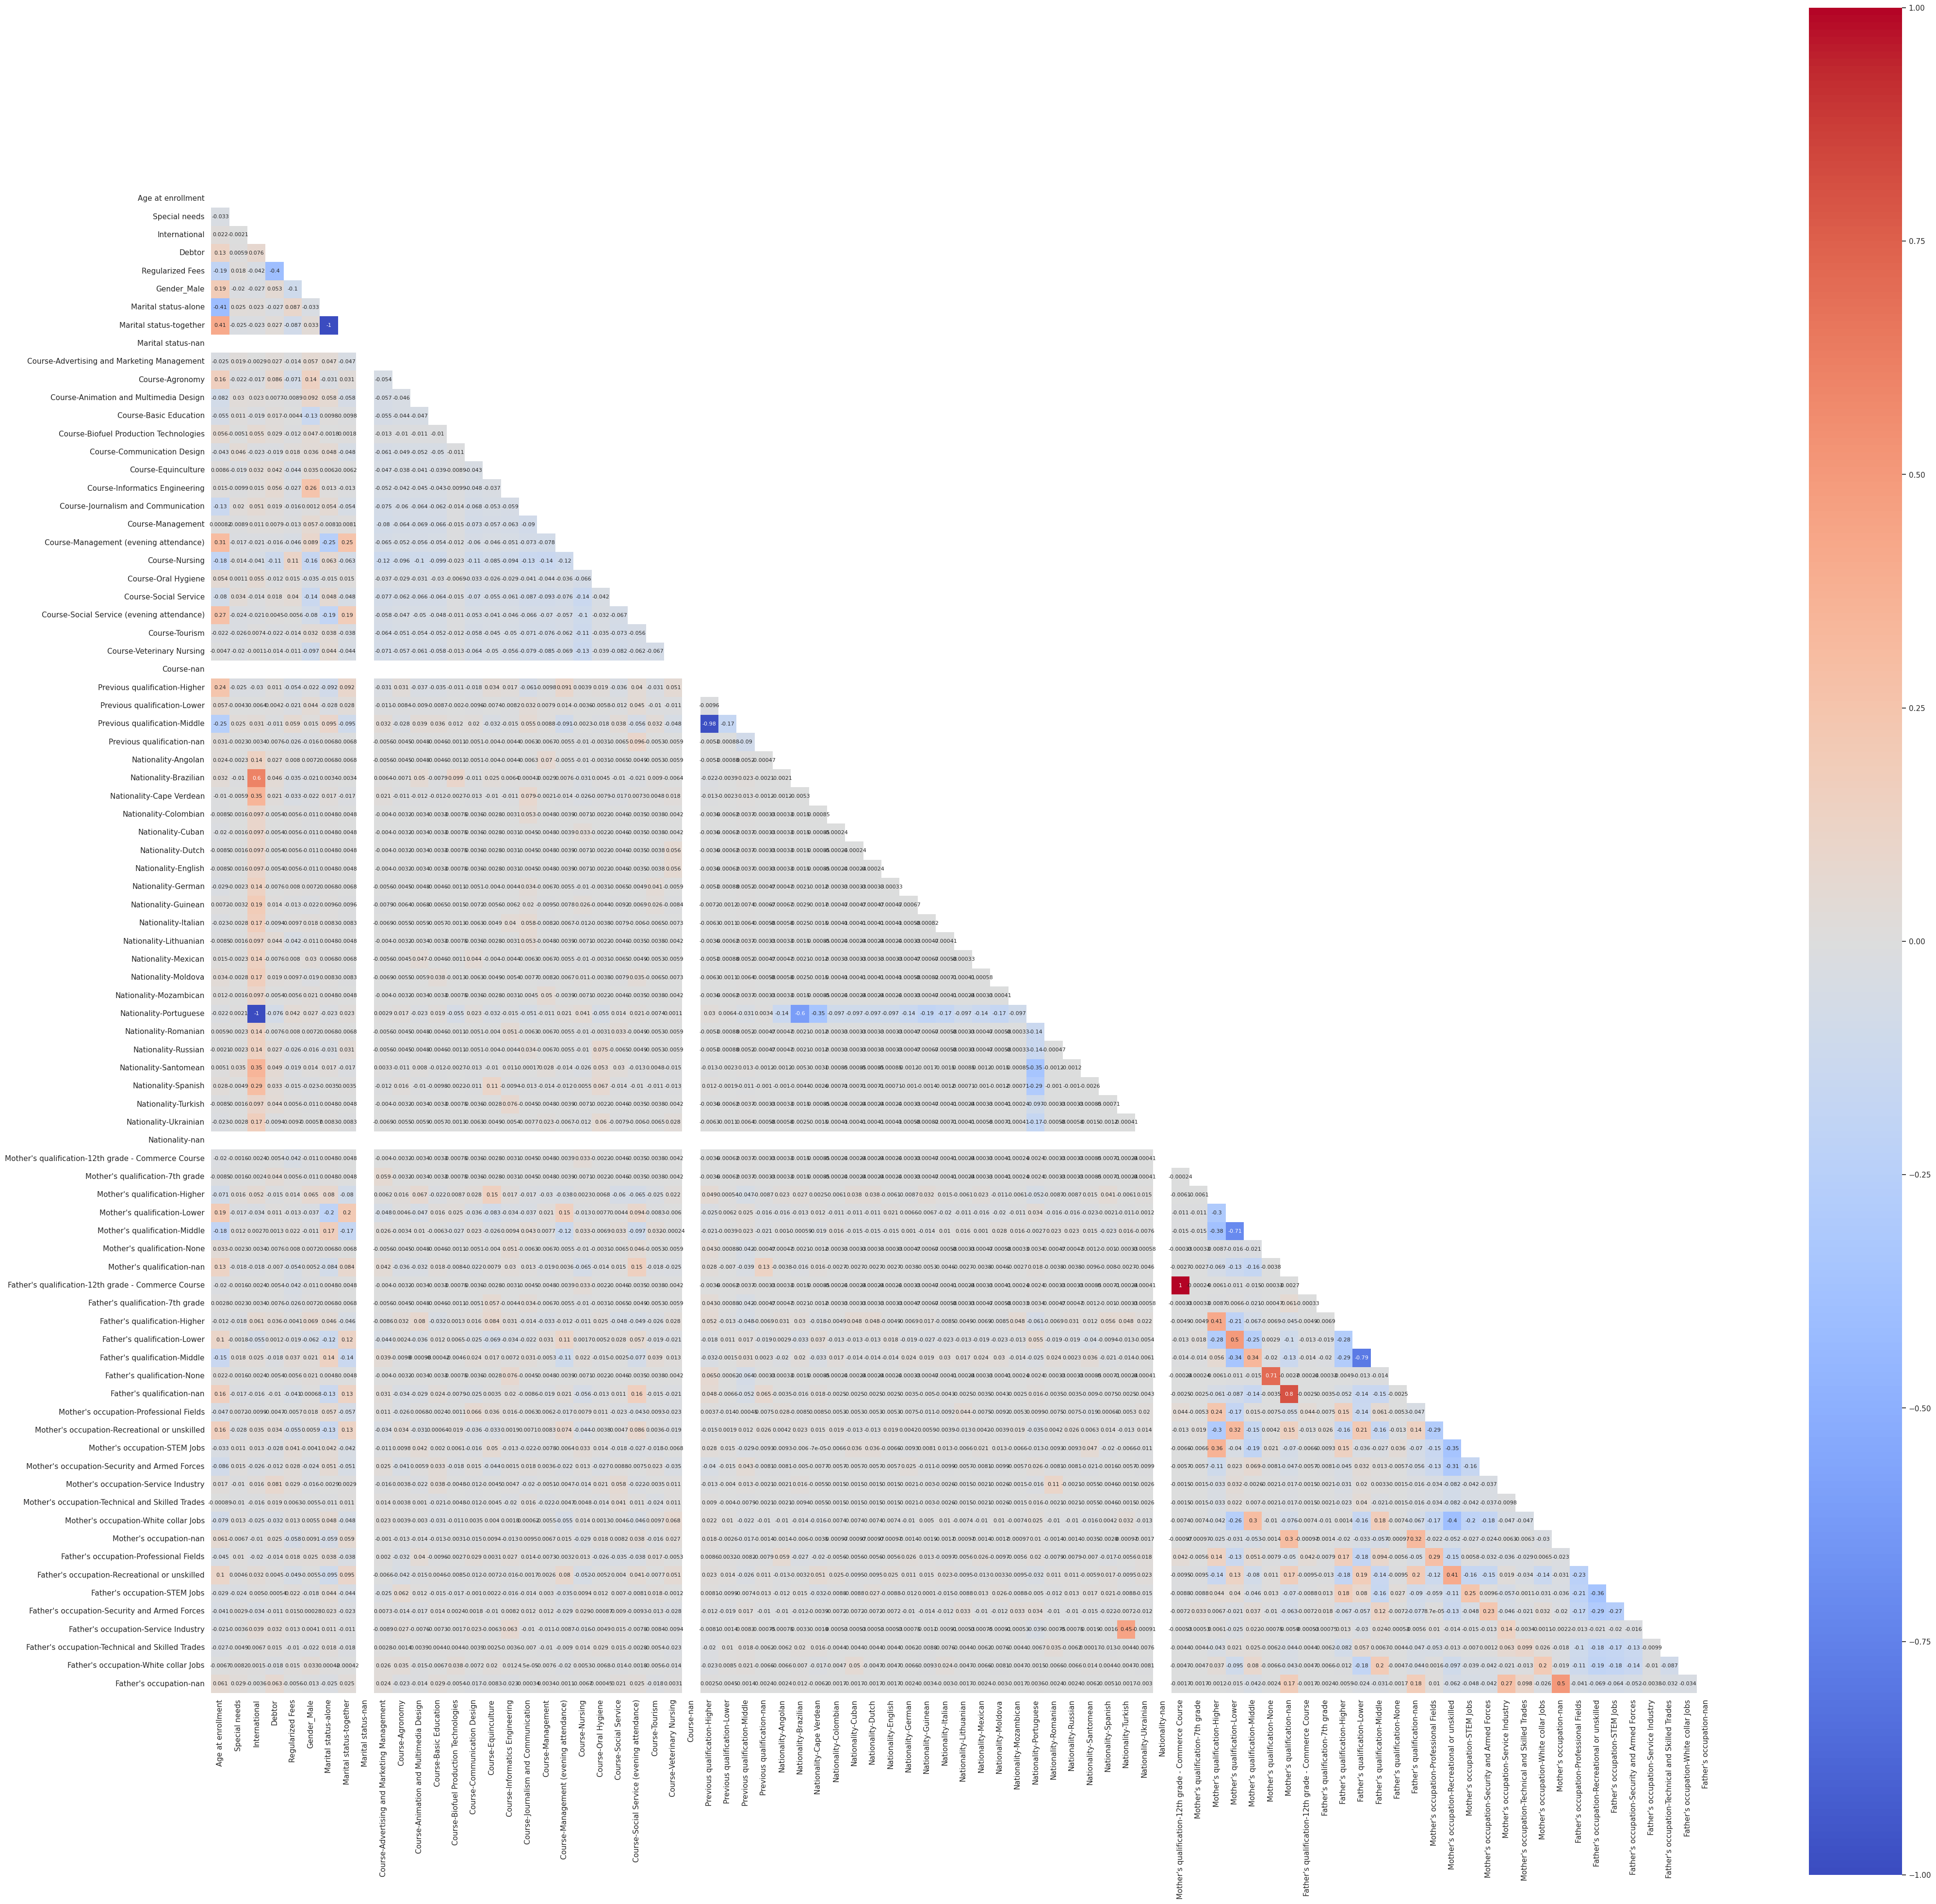

In [244]:
mask = np.zeros_like(dataDemographicDF.corr("spearman"))
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(50,50))
    ax = sns.heatmap(dataDemographicDF.corr("spearman"),mask=mask, annot = True,cmap='coolwarm',square=True,vmin=-1, vmax=1)

In [245]:
cor_spearman = dataDemographicDF[dataDemographicDF.columns].corr(method='spearman')
cor_spearman

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
# display only highly correlated (>=90%) features
threshold=0.8

mask = cor_spearman.abs() > threshold

high_cor = cor_spearman[mask].stack().reset_index()
high_cor.columns = ['Feature 1', 'Feature 2', 'Correlation']

# filter out where Feature1==Feature2
mask = high_cor['Feature 1'] == high_cor['Feature 2']
high_cor_filtered = high_cor[~mask]

high_cor_filtered

Feature 1  \
3                                       International   
8                                Marital status-alone   
9                             Marital status-together   
29                      Previous qualification-Higher   
31                      Previous qualification-Middle   
48                             Nationality-Portuguese   
57  Mother's qualification-12th grade - Commerce C...   
64                         Mother's qualification-nan   
65  Father's qualification-12th grade - Commerce C...   
72                         Father's qualification-nan   

                                            Feature 2  Correlation  
3                              Nationality-Portuguese    -1.000000  
8                             Marital status-together    -1.000000  
9                                Marital status-alone    -1.000000  
29                      Previous qualification-Middle    -0.979399  
31                      Previous qualification-Higher    -0.979399  
48                                      International    -1.000000  
57  Father's qualification-12th grade - Commerce C...     1.000000  
64                         Father's qualification-nan     0.802756  
65  Mother's qualification-12th grade - Commerce C...     1.000000  
72                         Mother's qualification-nan     0.802756

In [246]:
toRemove=['Nationality-Portuguese','Marital status-together','Mother\'s qualification-nan','Previous qualification-Higher',
          'Mother\'s qualification-12th grade - Commerce Course']

In [247]:
dataDemographicDF.drop(toRemove,axis=1,inplace=True)
toRemove=[]

In [248]:
from sklearn.cluster import KMeans

In [249]:
#setting range for possible values o k - 1 to 12
ks = range(1, 20)
inertias = [] #Creating pretty list to store results in

for k in tqdm(ks):
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(dataDemographicDF)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

  0%|          | 0/19 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
  5%|▌         | 1/19 [00:00<00:05,  3.50it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 11%|█         | 2/19 [00:00<00:08,  1.97it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 16%|█▌        | 3/19 [00:02<00:12,  1.28it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will cha

### elbow

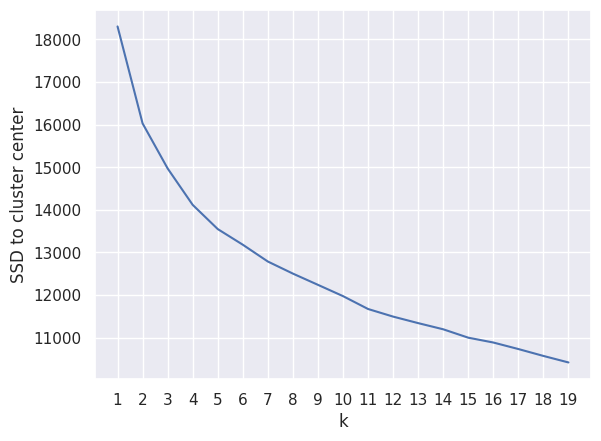

In [250]:
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot().
plt.plot(ks, inertias)

# define the label for x axis as 'k'
plt.xlabel('k')
# define the label for y axis as 'SSD'
plt.ylabel('SSD to cluster center')
# define the ticks in x axis using the values of ks
plt.xticks(ks)
# call plt.show()
plt.show()

### Silhuette score

In [251]:
from sklearn.metrics import silhouette_score

##setting range for possible values o k - 2 to 12
ks = range(2, 21)
sil_score = [] #Creating pretty list to store results in

for k in tqdm(ks):
#    # Create a KMeans instance with k clusters: model
   model = KMeans(n_clusters=k)

#    # Fit model to samples
   model.fit_predict(dataDemographicDF)

#    # Calculate Silhoutte Score
   sil_score.append(silhouette_score(dataDemographicDF, model.labels_, metric='euclidean'))

  0%|          | 0/19 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
  5%|▌         | 1/19 [00:01<00:21,  1.19s/it]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 11%|█         | 2/19 [00:02<00:18,  1.07s/it]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 16%|█▌        | 3/19 [00:03<00:16,  1.02s/it]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will cha

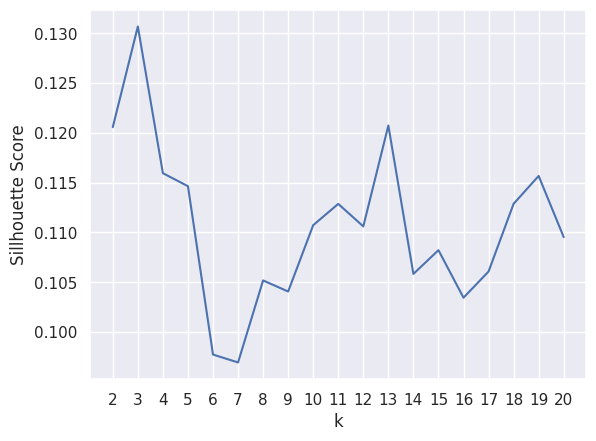

In [252]:
plt.plot(ks, sil_score)

## define the label for x axis as 'k'
plt.xlabel('k')
## define the label for y axis as 'Silhouette Score'
plt.ylabel('Sillhouette Score')
## define the ticks in x axis using the values of ks
plt.xticks(ks)
## call plt.show()
plt.show()

### Hierarchical

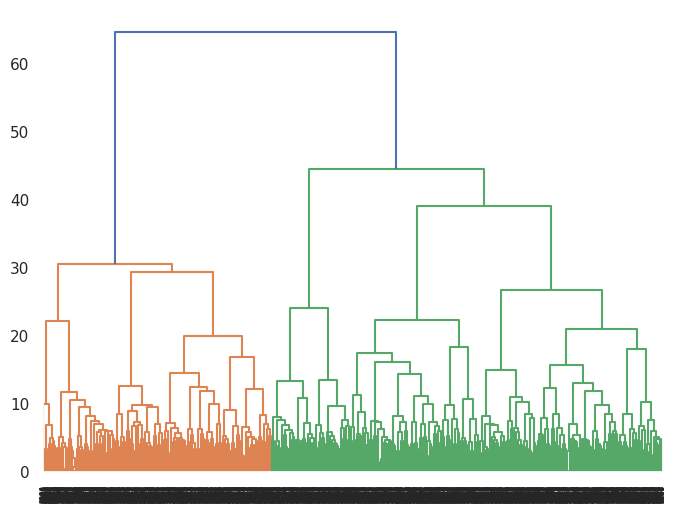

In [253]:
from scipy.cluster import hierarchy
##from sklearn.cluster import AgglomerativeClustering - The option available in sklearn

## create clusters using the "ward method"
clusters = hierarchy.linkage(dataDemographicDF, method="ward")

## create the dendrogram using the hierarchy.dendrogram() method.
plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
plt.show()
#plt.savefig("images/Hierarchical_results_artist_perspective.png", dpi=300)

In [254]:
kmeans_2 = KMeans(n_clusters = 3, random_state = 100).fit(dataDemographicDF)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [255]:
dataDemographicDF['label'] = kmeans_2.predict(dataDemographicDF)

<ipython-input-129-8dc2189a8ab8>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label, y="counts", data=counts, ax=ax[1], palette = color)
<ipython-input-129-8dc2189a8ab8>:19: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.barplot(x=label, y="counts", data=counts, ax=ax[1], palette = color)
<ipython-input-129-8dc2189a8ab8>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(cluster_labels)


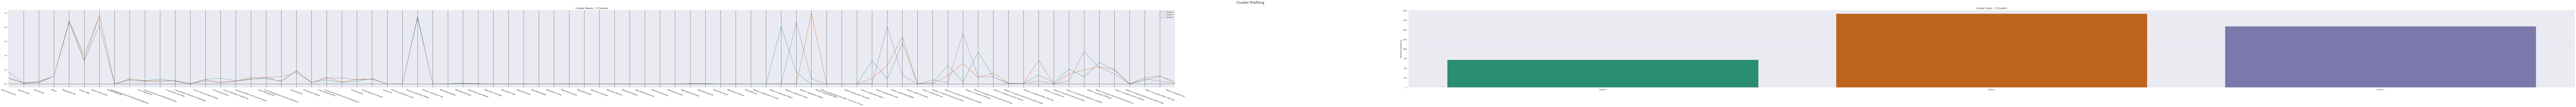

In [256]:
#profiling the cluster with the function
cluster_profiles(dataDemographicDF, ["label"], figsize=(300, 10))

Many of the features have a low variability between clusters, so will be removed

### Removing low variance features

In [257]:
nationality = [s for s in dataDemographicDF.columns if s.startswith("Nationality")]
course=[s for s in dataDemographicDF.columns if s.startswith("Course")]
prevQual=[s for s in dataDemographicDF.columns if s.startswith("Previous qualification")]


In [258]:
toRemove=['Special needs','International','Debtor','Regularized Fees','Marital status-nan',
          'Father\'s qualification-7th grade','Father\'s qualification-7th grade',
          'Father\'s qualification-None','Mother\'s occupation-Service Industry',
          'Mother\'s occupation-White collar Jobs','Father\'s occupation-Professional Fields',
          'Father\'s occupation-Service Industry','Father\'s occupation-Technical and Skilled Trades',
          'Father\'s occupation-White collar Jobs','Father\'s occupation-nan',
          'Mother\'s qualification-7th grade','Mother\'s qualification-None',
          'Father\'s qualification-12th grade - Commerce Course',
          'Mother\'s occupation-Technical and Skilled Trades',
          'Mother\'s occupation-nan','Father\'s occupation-Security and Armed Forces',
          'Father\'s qualification-nan']

In [259]:
dataDemographicDF.drop(nationality,inplace=True,axis=1)
dataDemographicDF.drop(course,inplace=True,axis=1)
dataDemographicDF.drop(prevQual,inplace=True,axis=1)
dataDemographicDF.drop(toRemove,inplace=True,axis=1)

In [260]:
#setting range for possible values o k - 1 to 12
ks = range(1, 20)
inertias = [] #Creating pretty list to store results in

for k in tqdm(ks):
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(dataDemographicDF)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

  0%|          | 0/19 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
  5%|▌         | 1/19 [00:00<00:08,  2.04it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 11%|█         | 2/19 [00:00<00:08,  2.12it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 16%|█▌        | 3/19 [00:01<00:09,  1.71it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will cha

### Elbow

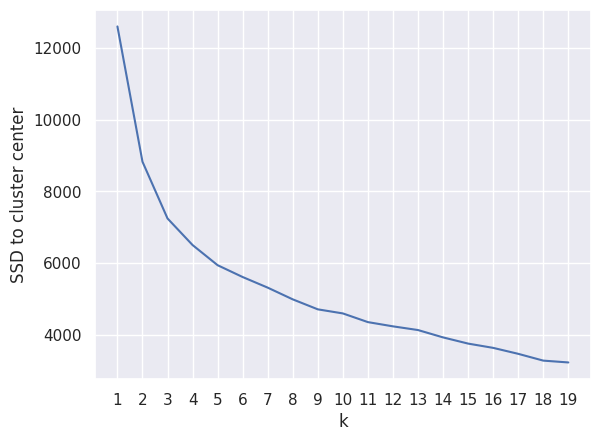

In [261]:
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot().
plt.plot(ks, inertias)

# define the label for x axis as 'k'
plt.xlabel('k')
# define the label for y axis as 'SSD'
plt.ylabel('SSD to cluster center')
# define the ticks in x axis using the values of ks
plt.xticks(ks)
# call plt.show()
plt.show()

### Silhuette score

In [262]:
from sklearn.metrics import silhouette_score

##setting range for possible values o k - 2 to 12
ks = range(2, 20)
sil_score = [] #Creating pretty list to store results in

for k in tqdm(ks):
#    # Create a KMeans instance with k clusters: model
   model = KMeans(n_clusters=k)

#    # Fit model to samples
   model.fit_predict(dataDemographicDF)

#    # Calculate Silhoutte Score
   sil_score.append(silhouette_score(dataDemographicDF, model.labels_, metric='euclidean'))

  0%|          | 0/18 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
  6%|▌         | 1/18 [00:00<00:13,  1.24it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 11%|█         | 2/18 [00:01<00:11,  1.35it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 17%|█▋        | 3/18 [00:02<00:13,  1.08it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will cha

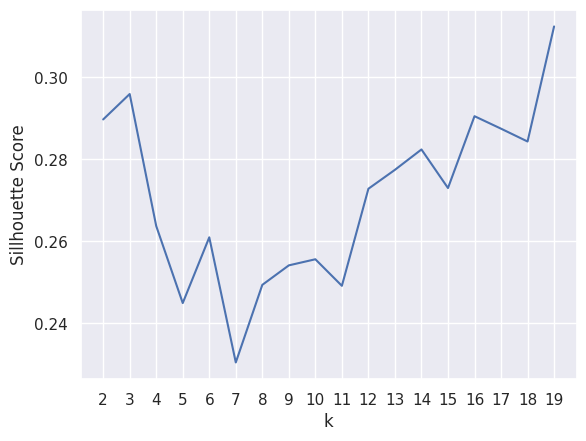

In [263]:
plt.plot(ks, sil_score)

## define the label for x axis as 'k'
plt.xlabel('k')
## define the label for y axis as 'Silhouette Score'
plt.ylabel('Sillhouette Score')
## define the ticks in x axis using the values of ks
plt.xticks(ks)
## call plt.show()
plt.show()

### Hierarchical

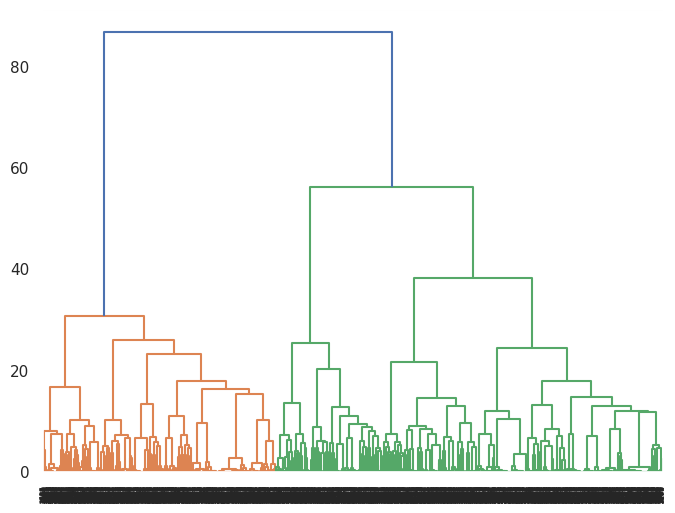

In [264]:
from scipy.cluster import hierarchy
##from sklearn.cluster import AgglomerativeClustering - The option available in sklearn

## create clusters using the "ward method"
clusters = hierarchy.linkage(dataDemographicDF, method="ward")

## create the dendrogram using the hierarchy.dendrogram() method.
plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
plt.show()
#plt.savefig("images/Hierarchical_results_artist_perspective.png", dpi=300)

In [265]:
kmeans_2 = KMeans(n_clusters = 3, random_state = 100).fit(dataDemographicDF)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [266]:
dataDemographicDF['label'] = kmeans_2.predict(dataDemographicDF)

<ipython-input-129-8dc2189a8ab8>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label, y="counts", data=counts, ax=ax[1], palette = color)
<ipython-input-129-8dc2189a8ab8>:19: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.barplot(x=label, y="counts", data=counts, ax=ax[1], palette = color)
<ipython-input-129-8dc2189a8ab8>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(cluster_labels)


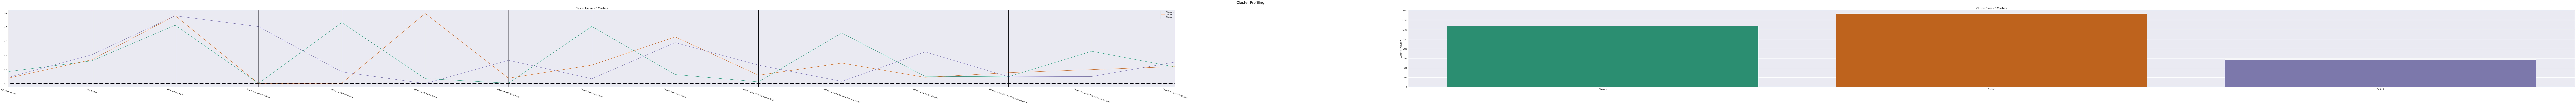

In [267]:
#profiling the cluster with the function
cluster_profiles(dataDemographicDF, ["label"], figsize=(300, 10))

  0%|          | 0/16 [00:00<?, ?it/s]

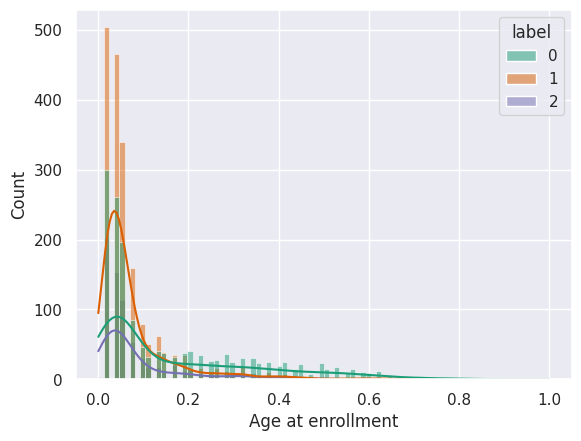

  6%|▋         | 1/16 [00:00<00:14,  1.01it/s]

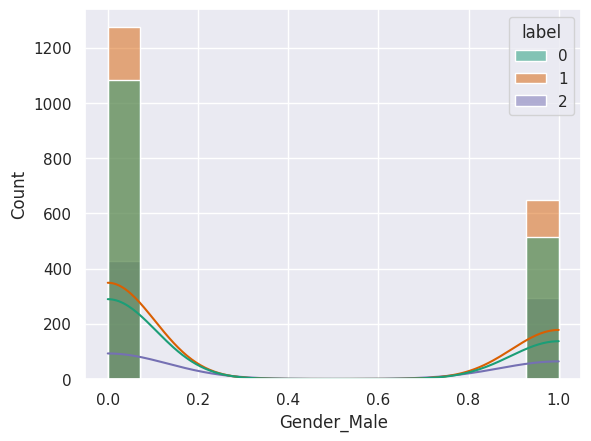

 12%|█▎        | 2/16 [00:01<00:12,  1.13it/s]

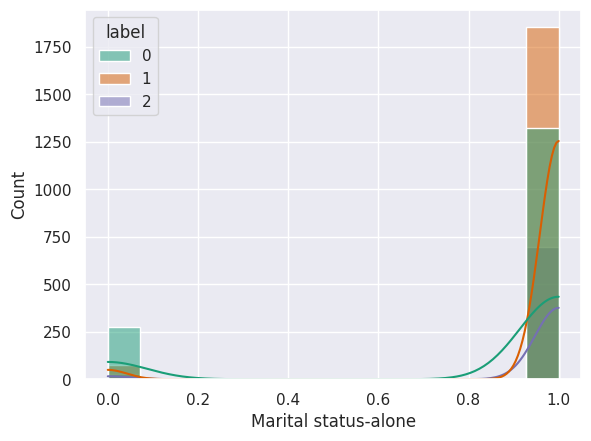

 19%|█▉        | 3/16 [00:02<00:12,  1.02it/s]

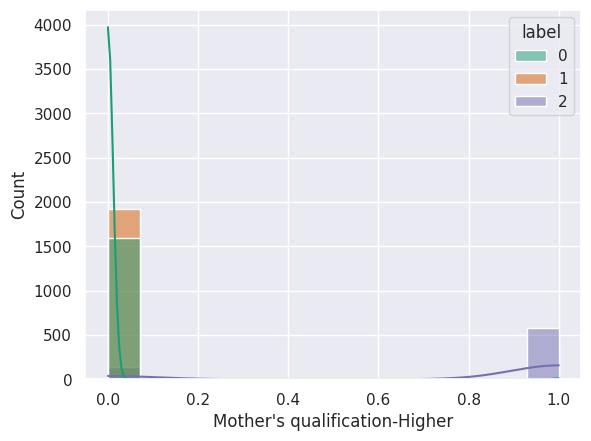

 25%|██▌       | 4/16 [00:03<00:11,  1.09it/s]

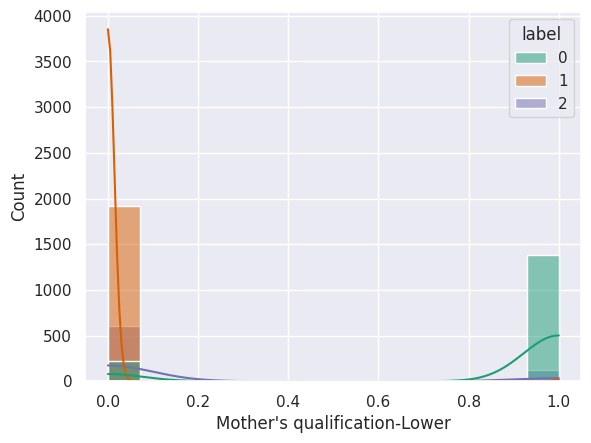

 31%|███▏      | 5/16 [00:04<00:08,  1.28it/s]

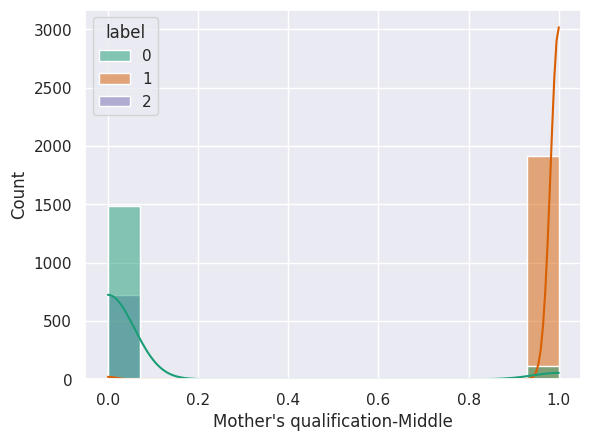

 38%|███▊      | 6/16 [00:04<00:07,  1.36it/s]

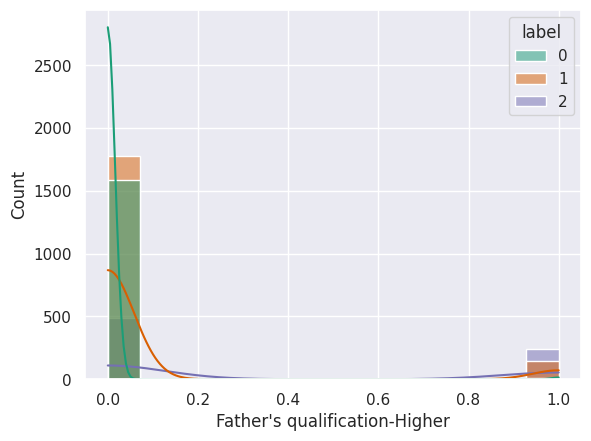

 44%|████▍     | 7/16 [00:05<00:06,  1.31it/s]

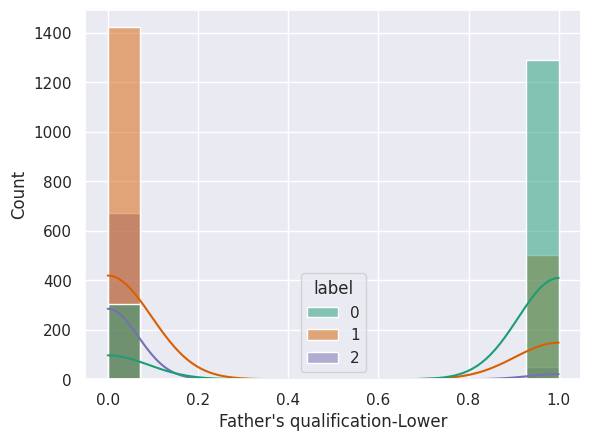

 50%|█████     | 8/16 [00:06<00:06,  1.26it/s]

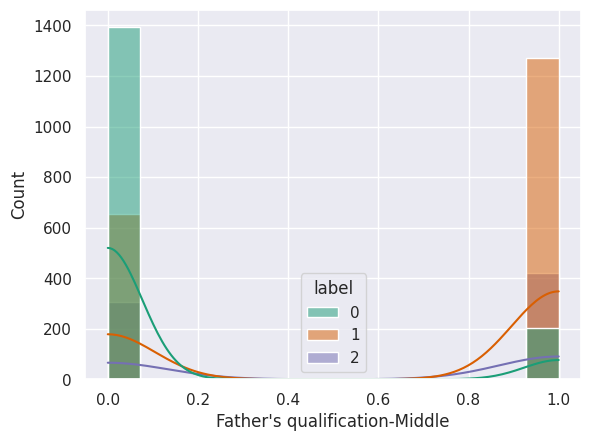

 56%|█████▋    | 9/16 [00:07<00:05,  1.23it/s]

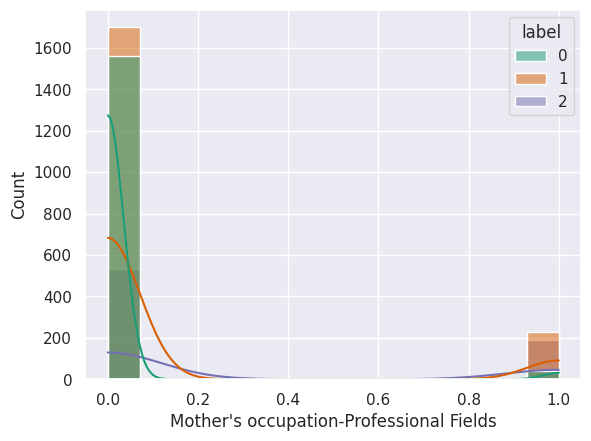

 62%|██████▎   | 10/16 [00:08<00:04,  1.20it/s]

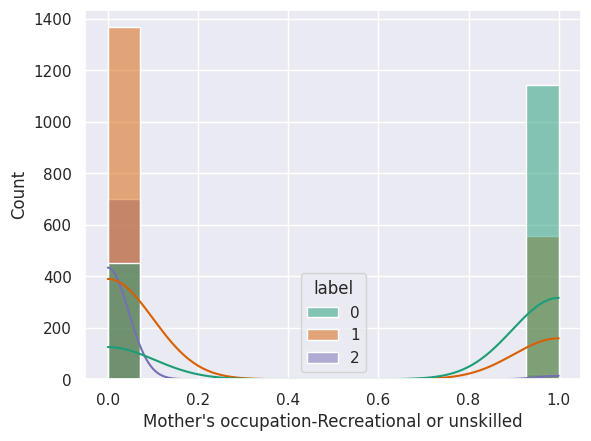

 69%|██████▉   | 11/16 [00:09<00:04,  1.19it/s]

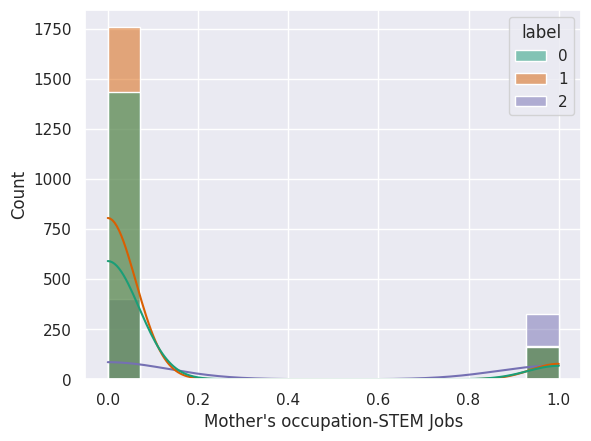

 75%|███████▌  | 12/16 [00:09<00:03,  1.22it/s]

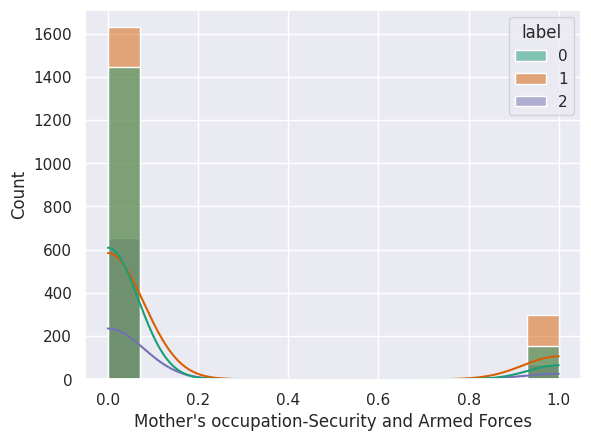

 81%|████████▏ | 13/16 [00:10<00:02,  1.37it/s]

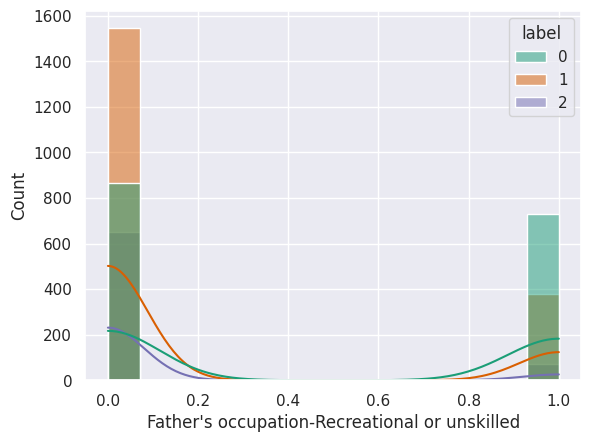

 88%|████████▊ | 14/16 [00:10<00:01,  1.52it/s]

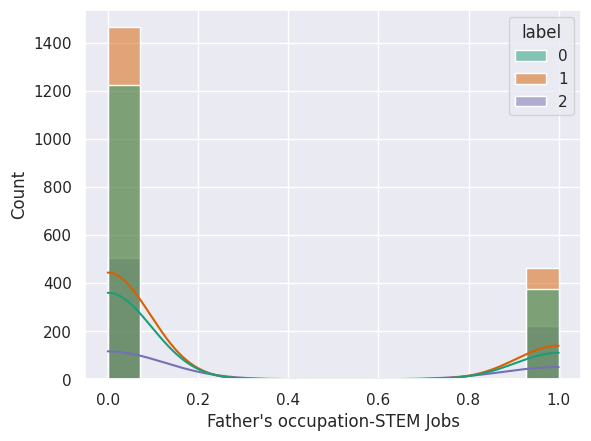

 94%|█████████▍| 15/16 [00:11<00:00,  1.64it/s]

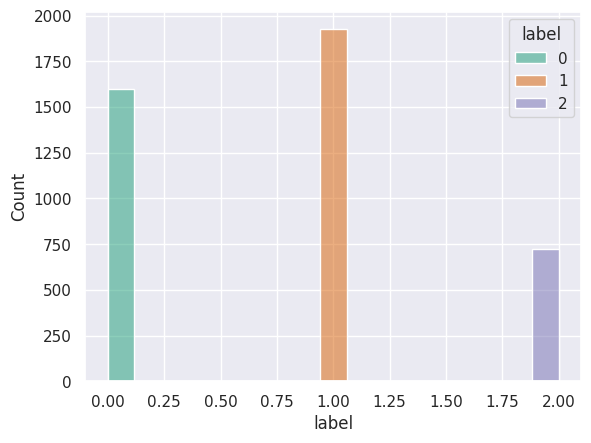

100%|██████████| 16/16 [00:13<00:00,  1.22it/s]


In [268]:
for i in tqdm(dataDemographicDF.columns):
    sns.histplot(dataDemographicDF, x = i, hue='label', kde = True, legend = True, palette = 'Dark2')
    plt.show()

### DF describe

In [269]:
dataDemographicDF.groupby(['label']).describe().T

label                                                          0            1  \
Age at enrollment                             count  1597.000000  1925.000000   
                                              mean      0.169551     0.077550   
                                              std       0.179604     0.090090   
                                              min       0.018868     0.000000   
                                              25%       0.037736     0.018868   
                                              50%       0.075472     0.037736   
                                              75%       0.283019     0.075472   
                                              max       1.000000     0.679245   
Gender_Male                                   count  1597.000000  1925.000000   
                                              mean      0.321227     0.337662   
                                              std       0.467094     0.473036   
                                              min       0.000000     0.000000   
                                              25%       0.000000     0.000000   
                                              50%       0.000000     0.000000   
                                              75%       1.000000     1.000000   
                                              max       1.000000     1.000000   
Marital status-alone                          count  1597.000000  1925.000000   
                                              mean      0.826550     0.962078   
                                              std       0.378755     0.191057   
                                              min       0.000000     0.000000   
                                              25%       1.000000     1.000000   
                                              50%       1.000000     1.000000   
                                              75%       1.000000     1.000000   
                                              max       1.000000     1.000000   
Mother's qualification-Higher                 count  1597.000000  1925.000000   
                                              mean      0.002505     0.000000   
                                              std       0.050000     0.000000   
                                              min       0.000000     0.000000   
                                              25%       0.000000     0.000000   
                                              50%       0.000000     0.000000   
                                              75%       0.000000     0.000000   
                                              max       1.000000     0.000000   
Mother's qualification-Lower                  count  1597.000000  1925.000000   
                                              mean      0.864120     0.004156   
                                              std       0.342768     0.064348   
                                              min       0.000000     0.000000   
                                              25%       1.000000     0.000000   
                                              50%       1.000000     0.000000   
                                              75%       1.000000     0.000000   
                                              max       1.000000     1.000000   
Mother's qualification-Middle                 count  1597.000000  1925.000000   
                                              mean      0.070131     0.993247   
                                              std       0.255448     0.081921   
                                              min       0.000000     0.000000   
                                              25%       0.000000     1.000000   
                                              50%       0.000000     1.000000   
                                              75%       0.000000     1.000000   
                                              max       1.000000     1.000000   
Father's qualification-Higher  

# Joining perspectives

In [270]:
data['academic_profile']=academicResults['label']
data['demographic_profile']=dataDemographicDF['label']

In [271]:
data['final_groups'] = data.groupby(['academic_profile', 'demographic_profile'], sort = False).ngroup()

In [272]:
unusedColumns=[s for s in data.columns if s not in dataDemographicDF.columns]
unusedColumns2=[s for s in data.columns if s not in academicData]

In [273]:
unusedColumns = set(unusedColumns)
unusedColumns2 = set(unusedColumns2)

unusedColumns.difference(unusedColumns2)
unusedColumns2.difference(unusedColumns)

usedColumnsAll=unusedColumns.difference(unusedColumns2).union(unusedColumns2.difference(unusedColumns))
usedColumnsAll

unusedColumnsAll=set(data.columns.difference(usedColumnsAll))
unusedColumnsAll

{'Application mode',
 'Application order',
 'Average grade 1st period',
 'Average grade 2nd period',
 'Average units credited',
 'Average units taken',
 'Average unscored units',
 'Course-Advertising and Marketing Management',
 'Course-Agronomy',
 'Course-Animation and Multimedia Design',
 'Course-Basic Education',
 'Course-Biofuel Production Technologies',
 'Course-Communication Design',
 'Course-Equinculture',
 'Course-Informatics Engineering',
 'Course-Journalism and Communication',
 'Course-Management',
 'Course-Management (evening attendance)',
 'Course-Nursing',
 'Course-Oral Hygiene',
 'Course-Social Service',
 'Course-Social Service (evening attendance)',
 'Course-Tourism',
 'Course-Veterinary Nursing',
 'Course-nan',
 'Debtor',
 'Displaced',
 'External Funding',
 "Father's occupation-Professional Fields",
 "Father's occupation-Security and Armed Forces",
 "Father's occupation-Service Industry",
 "Father's occupation-Technical and Skilled Trades",
 "Father's occupation-White co

In [274]:
unusedColumnsAll.remove('final_groups')

In [275]:
profiling_df=data.copy().drop(unusedColumnsAll,axis=1)

<ipython-input-129-8dc2189a8ab8>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label, y="counts", data=counts, ax=ax[1], palette = color)
<ipython-input-129-8dc2189a8ab8>:19: UserWarning: 
The palette list has fewer values (8) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=label, y="counts", data=counts, ax=ax[1], palette = color)
<ipython-input-129-8dc2189a8ab8>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(cluster_labels)


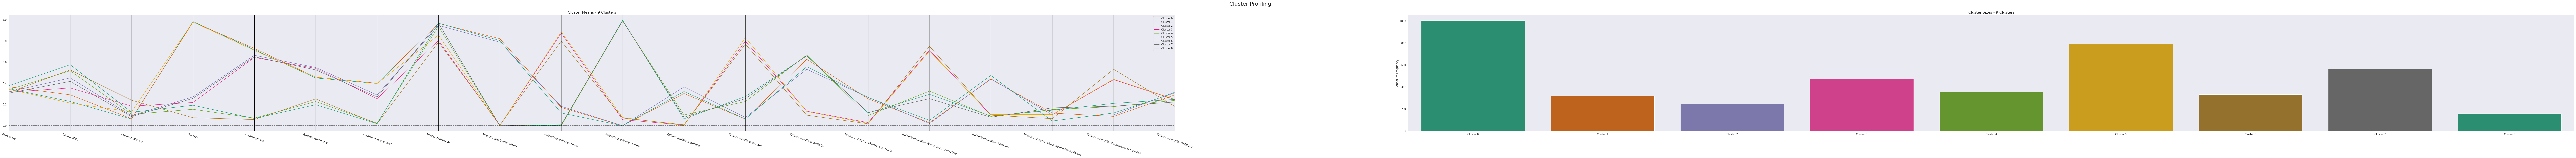

In [276]:
cluster_profiles(profiling_df, ["final_groups"], figsize=(200, 10))

  0%|          | 0/20 [00:00<?, ?it/s]

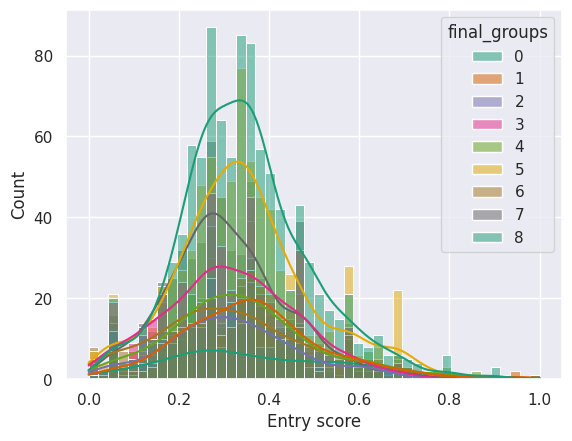

  5%|▌         | 1/20 [00:01<00:28,  1.49s/it]

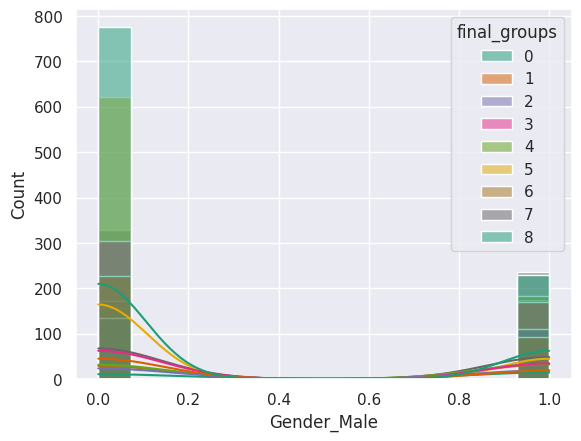

 10%|█         | 2/20 [00:02<00:19,  1.11s/it]

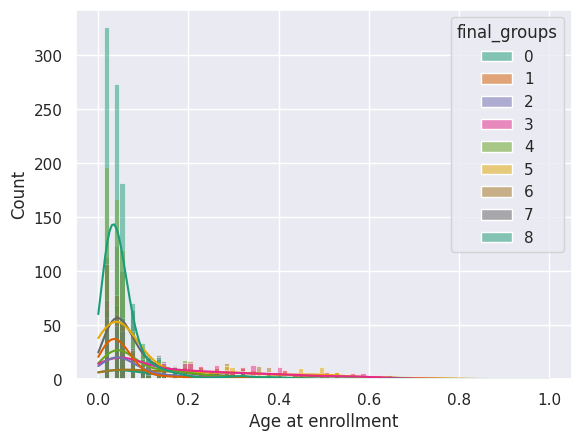

 15%|█▌        | 3/20 [00:04<00:25,  1.48s/it]

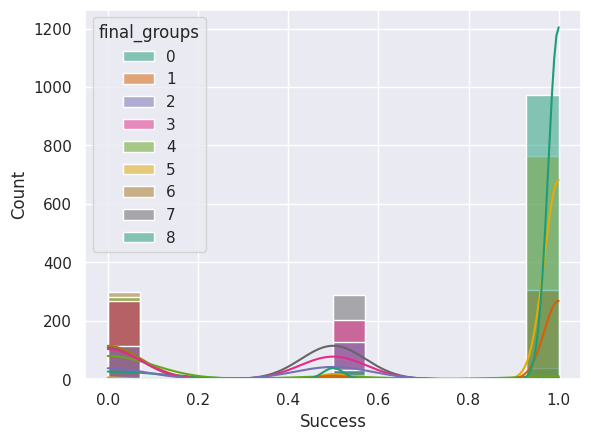

 20%|██        | 4/20 [00:05<00:19,  1.20s/it]

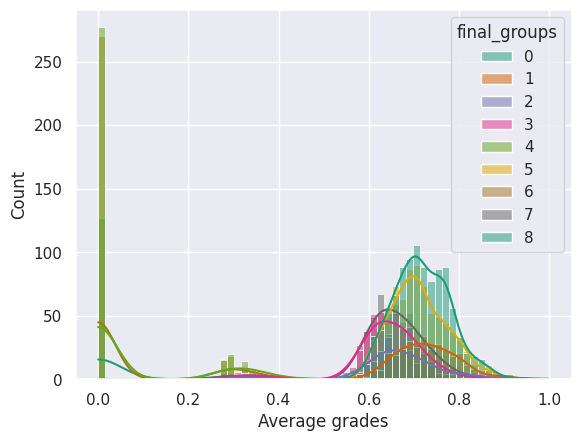

 25%|██▌       | 5/20 [00:07<00:24,  1.62s/it]

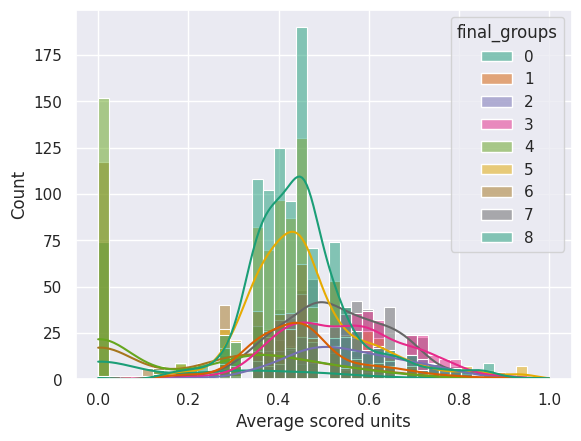

 30%|███       | 6/20 [00:08<00:20,  1.47s/it]

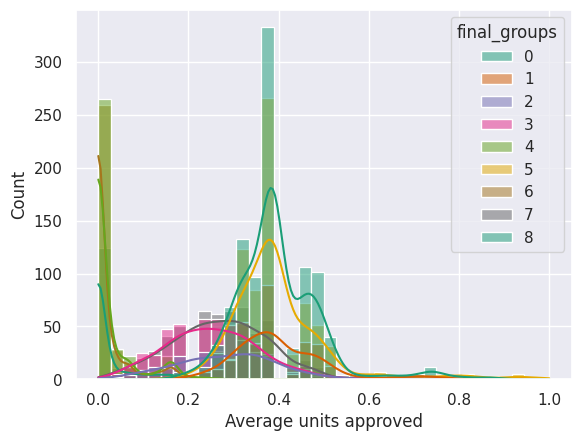

 35%|███▌      | 7/20 [00:09<00:17,  1.38s/it]

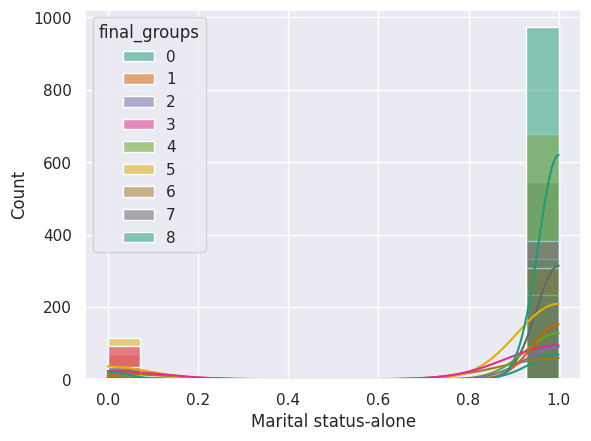

 40%|████      | 8/20 [00:10<00:15,  1.29s/it]

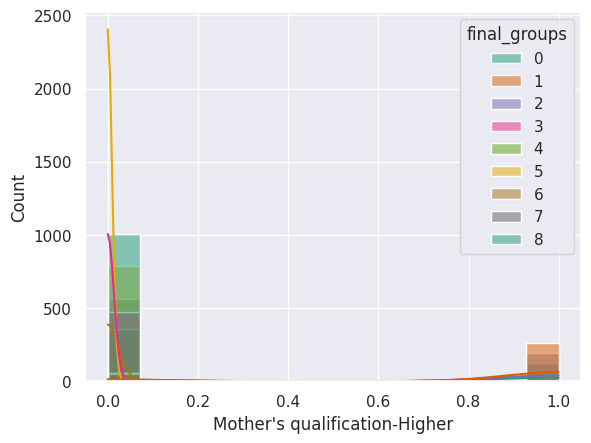

 45%|████▌     | 9/20 [00:12<00:13,  1.26s/it]

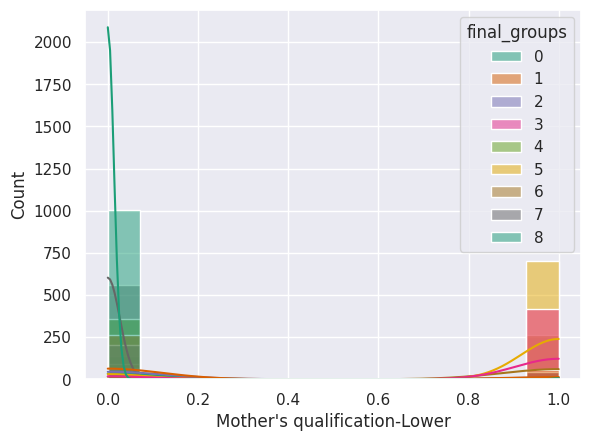

 50%|█████     | 10/20 [00:13<00:12,  1.24s/it]

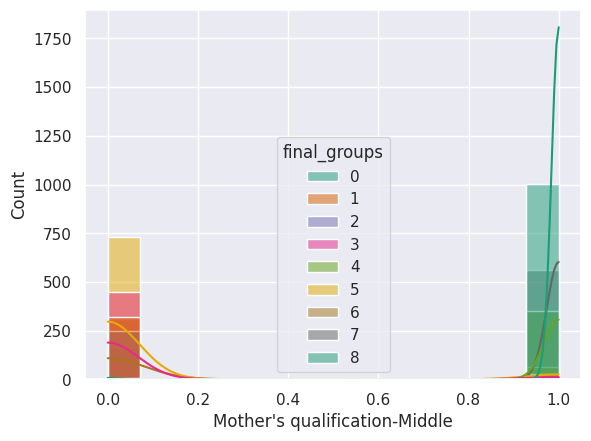

 55%|█████▌    | 11/20 [00:14<00:11,  1.29s/it]

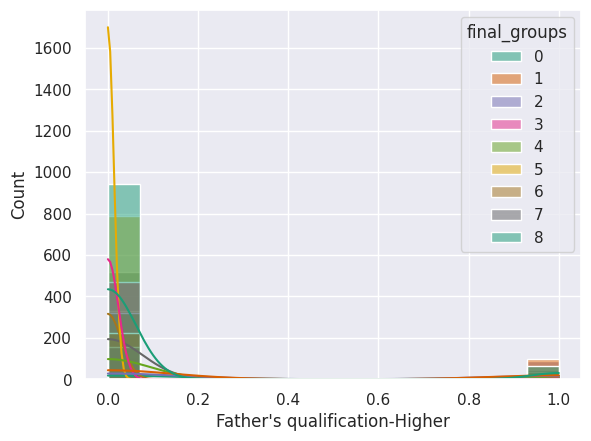

 60%|██████    | 12/20 [00:15<00:09,  1.16s/it]

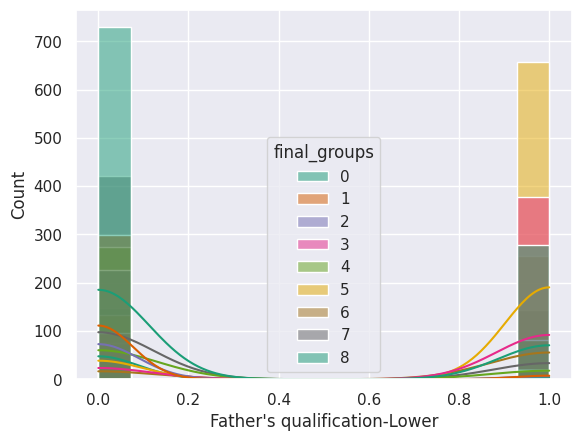

 65%|██████▌   | 13/20 [00:16<00:07,  1.05s/it]

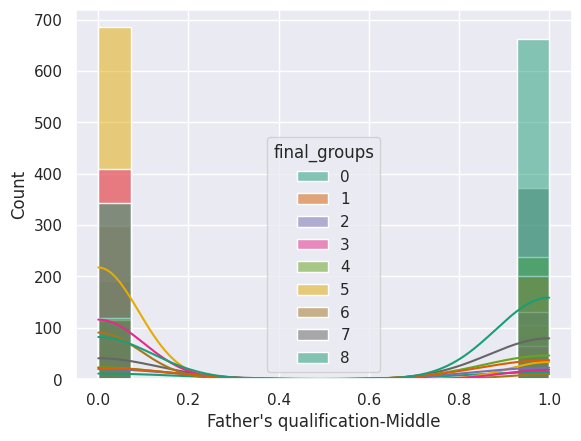

 70%|███████   | 14/20 [00:18<00:07,  1.25s/it]

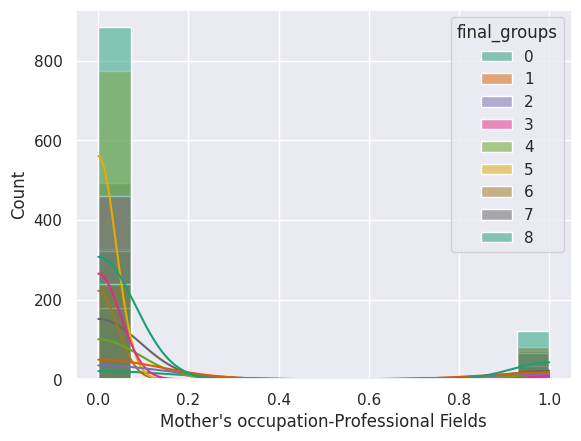

 75%|███████▌  | 15/20 [00:18<00:05,  1.10s/it]

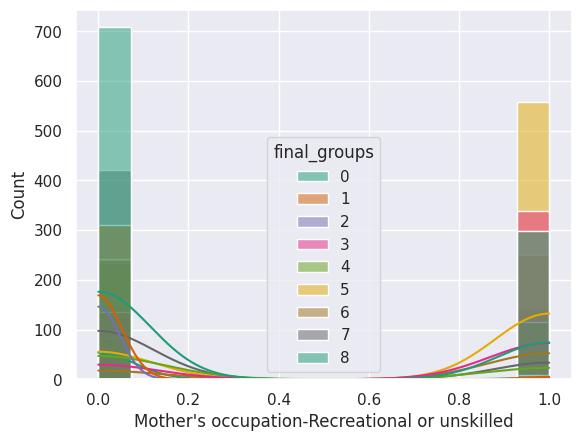

 80%|████████  | 16/20 [00:19<00:04,  1.02s/it]

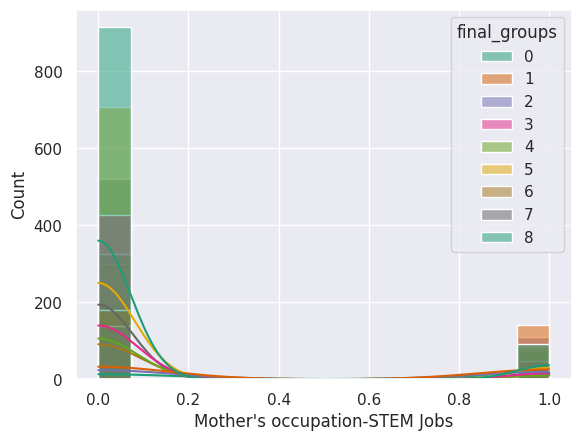

 85%|████████▌ | 17/20 [00:20<00:02,  1.06it/s]

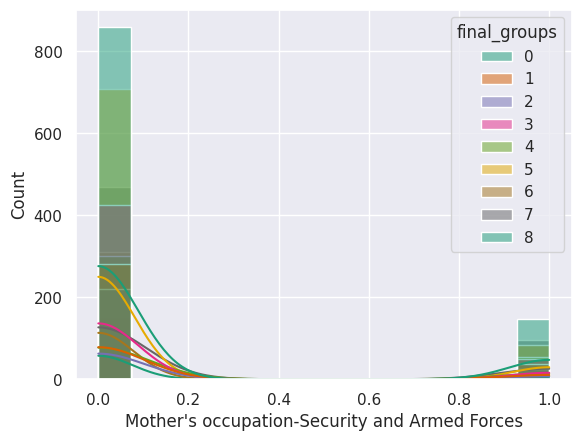

 90%|█████████ | 18/20 [00:21<00:01,  1.11it/s]

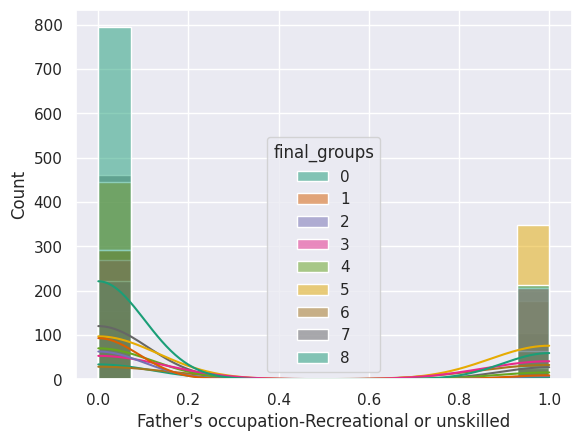

 95%|█████████▌| 19/20 [00:22<00:00,  1.14it/s]

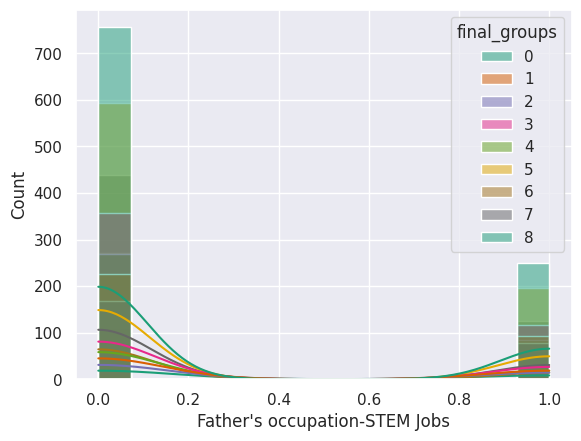

100%|██████████| 20/20 [00:22<00:00,  1.14s/it]


In [277]:
for i in tqdm(profiling_df.drop('final_groups', axis = 1).columns):
    sns.histplot(profiling_df, x = i, hue='final_groups', kde = True, legend = True, palette = 'Dark2')
    plt.show()

In [278]:
profiling_df.groupby(['final_groups']).describe().T

final_groups                                                   0           1  \
Entry score                                   count  1006.000000  319.000000   
                                              mean      0.349474    0.367134   
                                              std       0.142012    0.161624   
                                              min       0.010526    0.041053   
                                              25%       0.260000    0.260000   
                                              50%       0.336842    0.357895   
                                              75%       0.421842    0.446316   
                                              max       1.000000    1.000000   
Gender_Male                                   count  1006.000000  319.000000   
                                              mean      0.228628    0.291536   
                                              std       0.420158    0.455184   
                                              min       0.000000    0.000000   
                                              25%       0.000000    0.000000   
                                              50%       0.000000    0.000000   
                                              75%       0.000000    1.000000   
                                              max       1.000000    1.000000   
Age at enrollment                             count  1006.000000  319.000000   
                                              mean      0.062268    0.065772   
                                              std       0.079400    0.085025   
                                              min       0.000000    0.000000   
                                              25%       0.018868    0.018868   
                                              50%       0.037736    0.037736   
                                              75%       0.056604    0.056604   
                                              max       0.679245    0.849057   
Success                                       count  1006.000000  319.000000   
                                              mean      0.983598    0.978056   
                                              std       0.091854    0.102583   
                                              min       0.000000    0.500000   
                                              25%       1.000000    1.000000   
                                              50%       1.000000    1.000000   
                                              75%       1.000000    1.000000   
                                              max       1.000000    1.000000   
Average grades                                count  1006.000000  319.000000   
                                              mean      0.717697    0.729936   
                                              std       0.066770    0.067455   
                                              min       0.000000    0.577018   
                                              25%       0.674295    0.680822   
                                              50%       0.714469    0.724691   
                                              75%       0.761766    0.772181   
                                              max       0.981881    1.000000   
Average scored units                          count  1006.000000  319.000000   
                                              mean      0.450412    0.458039   
                                              std       0.119386    0.131807   
                                              min       0.000000    0.171429   
                                              25%       0.371429    0.371429   
                                              50%       0.442857    0.457143   
                                              75%       0.485714    0.514286   
                                              max       1.000000    0.971429   
Average units approved                        count  1006.000000  319.000000   


In [284]:
profilingRealVals=dataDF[dataDF.columns.difference(unusedColumnsAll)].copy()
profilingRealVals=profilingRealVals.join(profiling_df['final_groups'],on='Userid')

In [285]:
profilingRealVals.groupby(['final_groups']).describe().T

final_groups                            0           1           2           3  \
Age at enrollment      count  1006.000000  319.000000  246.000000  474.000000   
                       mean     20.300199   20.485893   22.008130   26.776371   
                       std       4.208182    4.506350    5.609752    9.289597   
                       min      17.000000   17.000000   17.000000   18.000000   
                       25%      18.000000   18.000000   19.000000   19.000000   
                       50%      19.000000   19.000000   20.000000   23.000000   
                       75%      20.000000   20.000000   23.000000   32.000000   
                       max      53.000000   62.000000   54.000000   55.000000   
Average grades         count  1006.000000  319.000000  246.000000  474.000000   
                       mean     13.122116   13.345899   12.158946   11.775622   
                       std       1.220803    1.233329    1.731634    1.680281   
                       min       0.000000   10.550000    5.000000    5.000000   
                       25%      12.328571   12.447917   11.500000   11.166667   
                       50%      13.063095   13.250000   12.169643   11.865152   
                       75%      13.927857   14.118294   13.078234   12.583333   
                       max      17.952381   18.283654   16.083333   17.166667   
Average scored units   count  1006.000000  319.000000  246.000000  474.000000   
                       mean      7.882207    8.015674    9.619919    9.466245   
                       std       2.089250    2.306623    2.386794    2.460452   
                       min       0.000000    3.000000    0.000000    0.000000   
                       25%       6.500000    6.500000    8.000000    7.500000   
                       50%       7.750000    8.000000    9.500000    9.500000   
                       75%       8.500000    9.000000   11.000000   11.000000   
                       max      17.500000   17.000000   15.500000   16.500000   
Average units approved count  1006.000000  319.000000  246.000000  474.000000   
                       mean      6.173459    6.210031    4.493902    3.953586   
                       std       1.492262    1.607205    1.796528    1.638258   
                       min       2.500000    2.500000    0.500000    0.500000   
                       25%       5.000000    5.000000    3.500000    3.000000   
                       50%       6.000000    6.000000    4.500000    4.000000   
                       75%       7.000000    7.000000    5.500000    5.000000   
                       max      13.500000   14.500000   12.000000   11.500000   
Entry score            count  1006.000000  319.000000  246.000000  474.000000   
                       mean    128.200000  129.877743  125.400407  125.015401   
                       std      13.491094   15.354260   13.963327   13.821162   
                       min      96.000000   98.900000   95.000000   95.000000   
                       25%     119.700000  119.700000  116.650000  115.275000   
                       50%     127.000000  129.000000  124.750000  124.250000   
                       75%     135.075000  137.400000  133.375000  133.975000   
                       max     190.000000  190.000000  180.400000  170.000000   
Gender_Male            count  1006.000000  319.000000  246.000000  474.000000   
                       mean      0.228628    0.291536    0.451220    0.356540   
                       std       0.420158    0.455184    0.498629    0.479483   
                       min       0.000000    0.000000    0.000000    0.000000   
                       25%       0.000000    0.000000    0.000000    0.000000   
                       50%       0.000000    0.000000    0.000000    0.000000   
                       75%       0.000000    1.000000    1.000000    1.000000   
                       max       1.000000    1.000000    1.000000    1.000000   
Success                count  1